### Prediction And Forecasting Using Stacked LSTM

In [1]:
# https://github.com/krishnaik06/Stock-MArket-Forecasting
# https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

In [2]:
### Data Collection
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
#tf.__version__
from keras.layers import Bidirectional
#epoch
epc=30

In [3]:
### Data Collection
import pandas_datareader as pdr
key="9355310af715193b76c66915fa0ccb04f234ed56"

import pandas as pd
import matplotlib.pyplot as plt
from numpy import array

In [4]:
#df = pdr.get_data_tiingo('btcusd', start='2016-01-30', end='2020-12-17', api_key=key)
#df.to_csv('BTCpre.csv')

In [5]:
#df=pd.read_csv('Binance_ETHUSDT_minute.csv')
#df.head()

In [6]:
#import file from hard disk on Colb
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['Binance_ETHUSDT_minute.csv']))
# Dataset is now stored in a Pandas Dataframe
df.head()

Saving Binance_ETHUSDT_minute.csv to Binance_ETHUSDT_minute.csv


,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
0,1611014700000,2021-01-19 00:05:00,ETH/USDT,1268.79,1269.03,1264.42,1266.67,1453.76906,1.841852e+06,1268
1,1611014640000,2021-01-19 00:04:00,ETH/USDT,1271.33,1271.68,1265.28,1268.77,2868.63200,3.637392e+06,2411
2,1611014580000,2021-01-19 00:03:00,ETH/USDT,1271.97,1274.00,1271.08,1271.47,2142.78371,2.727261e+06,1809
3,1611014520000,2021-01-19 00:02:00,ETH/USDT,1269.98,1274.00,1269.00,1271.97,4205.36616,5.348080e+06,3597
4,1611014460000,2021-01-19 00:01:00,ETH/USDT,1266.01,1270.00,1263.89,1270.00,3274.82716,4.154301e+06,3023


In [7]:
df.sort_values(by=['date'], inplace=True, ascending=True)
df.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
185614,1599856800000,2020-09-11 20:40:00,ETH/USDT,369.00,369.00,368.61,368.69,631.71643,232958.316350,255
185613,1599856860000,2020-09-11 20:41:00,ETH/USDT,368.68,369.05,368.64,369.01,274.35788,101210.038533,166
185612,1599856920000,2020-09-11 20:42:00,ETH/USDT,369.02,369.02,368.70,368.71,152.76667,56345.879809,112
185611,1599856980000,2020-09-11 20:43:00,ETH/USDT,368.70,368.84,368.70,368.84,75.44480,27823.104609,65
185610,1599857040000,2020-09-11 20:44:00,ETH/USDT,368.76,368.76,368.59,368.68,212.69913,78416.708653,132


In [8]:
df.shape

(185615, 10)

In [9]:
df1=df.reset_index()['close']

<function matplotlib.pyplot.plot>

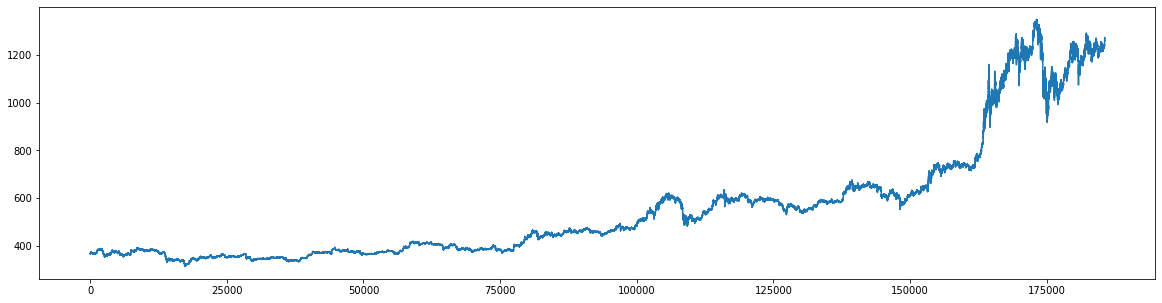

In [10]:
#plot imported and reseted  data
plt.figure(figsize=(20, 5))
plt.plot(df1)
plt.plot

### Part 1 - simple neural network

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [12]:
df1

0          368.69
1          369.01
2          368.71
3          368.84
4          368.68
           ...   
185610    1270.00
185611    1271.97
185612    1271.47
185613    1268.77
185614    1266.67
Name: close, Length: 185615, dtype: float64

In [13]:
# minmax tool. Minmax 0 to -1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.05210966]
 [0.05241955]
 [0.05212903]
 ...
 [0.92636278]
 [0.9237481 ]
 [0.92171446]]


In [15]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(148492, 37123)

In [17]:
#train_data

In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(148391, 100)
(148391,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(37022, 100)
(37022,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
#creating LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
#fit model into test set and based on parameters (epochs, batch_size and verbose). Those parameters can be optimized

In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=epc,batch_size=64,verbose=1)

# epochs = interaction
# in most cases, an optimal batch-size is 64
# Verbose=0 (silent) Verbose=1 (progress bar)

Epoch 1/10
2319/2319 [==============================] - 398s 170ms/step - loss: 3.5795e-04 - val_loss: 0.0038
Epoch 2/10
2319/2319 [==============================] - 396s 171ms/step - loss: 3.6367e-06 - val_loss: 0.0013
Epoch 3/10
2319/2319 [==============================] - 402s 173ms/step - loss: 3.4131e-06 - val_loss: 7.8773e-04
Epoch 4/10
2319/2319 [==============================] - 401s 173ms/step - loss: 2.8568e-06 - val_loss: 6.9890e-04
Epoch 5/10
2319/2319 [==============================] - 402s 173ms/step - loss: 1.7368e-06 - val_loss: 6.0023e-04
Epoch 6/10
2319/2319 [==============================] - 400s 173ms/step - loss: 1.5857e-06 - val_loss: 3.2200e-04
Epoch 7/10
2319/2319 [==============================] - 400s 173ms/step - loss: 1.2882e-06 - val_loss: 2.8462e-04
Epoch 8/10
2319/2319 [==============================] - 399s 172ms/step - loss: 9.3076e-07 - val_loss: 2.7758e-04
Epoch 9/10
2319/2319 [==============================] - 399s 172ms/step - loss: 1.0484e-06 - val

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

463.79084184718374

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

983.4785727915977

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100 #must change in accordance to step_back
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

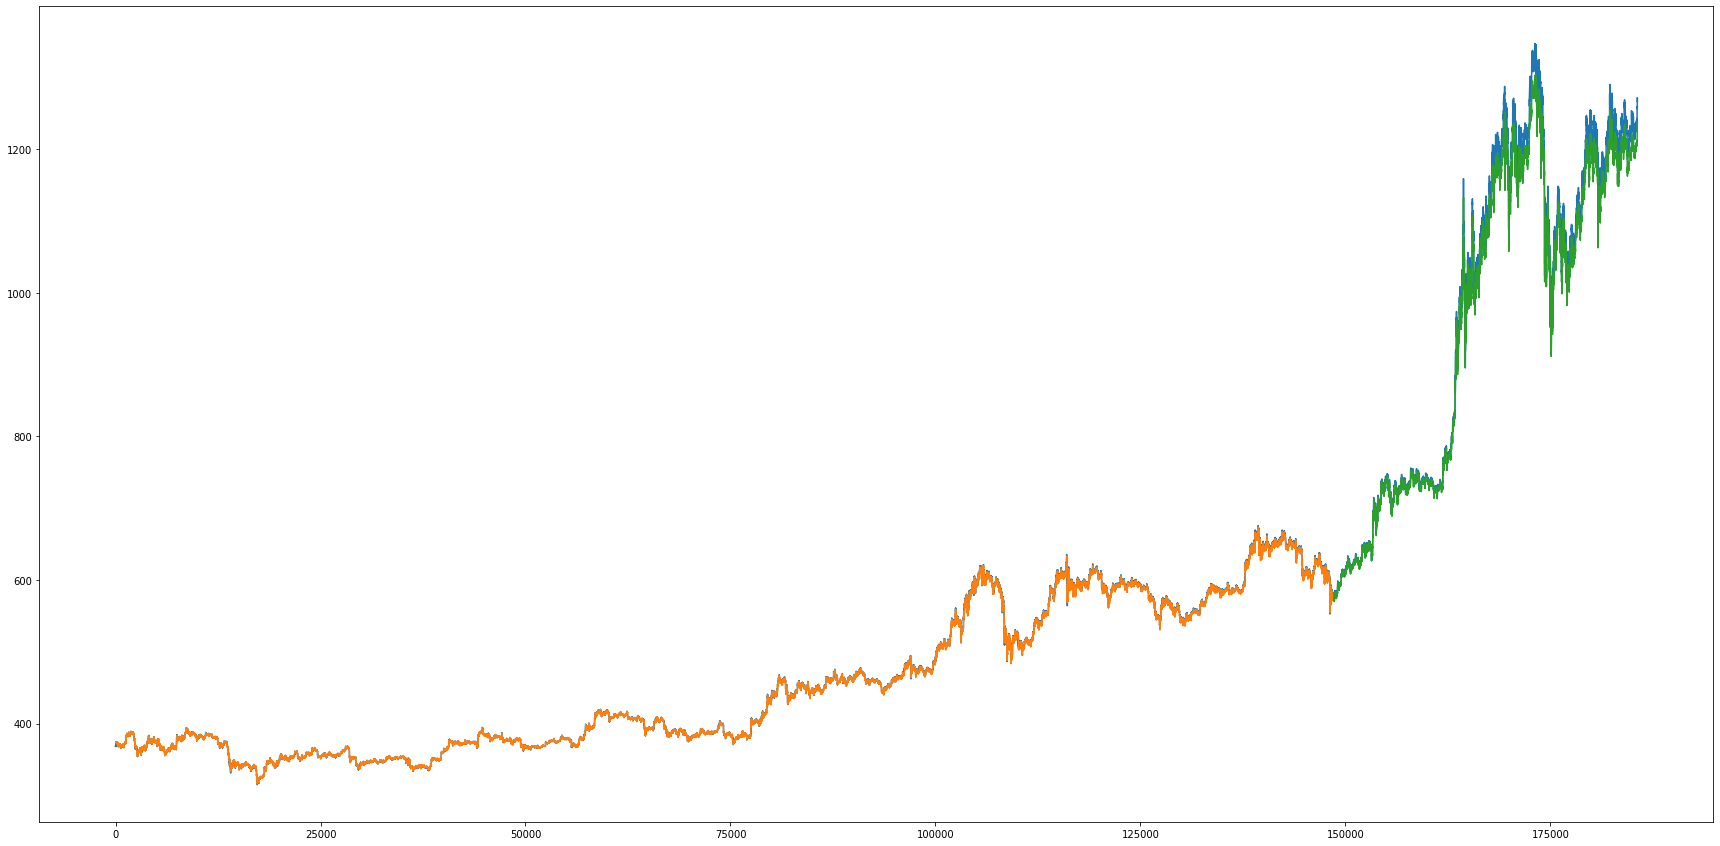

In [33]:
# plot baseline and predictions https://stackabuse.com/change-figure-size-in-matplotlib/
plt.figure(figsize=(30, 15))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

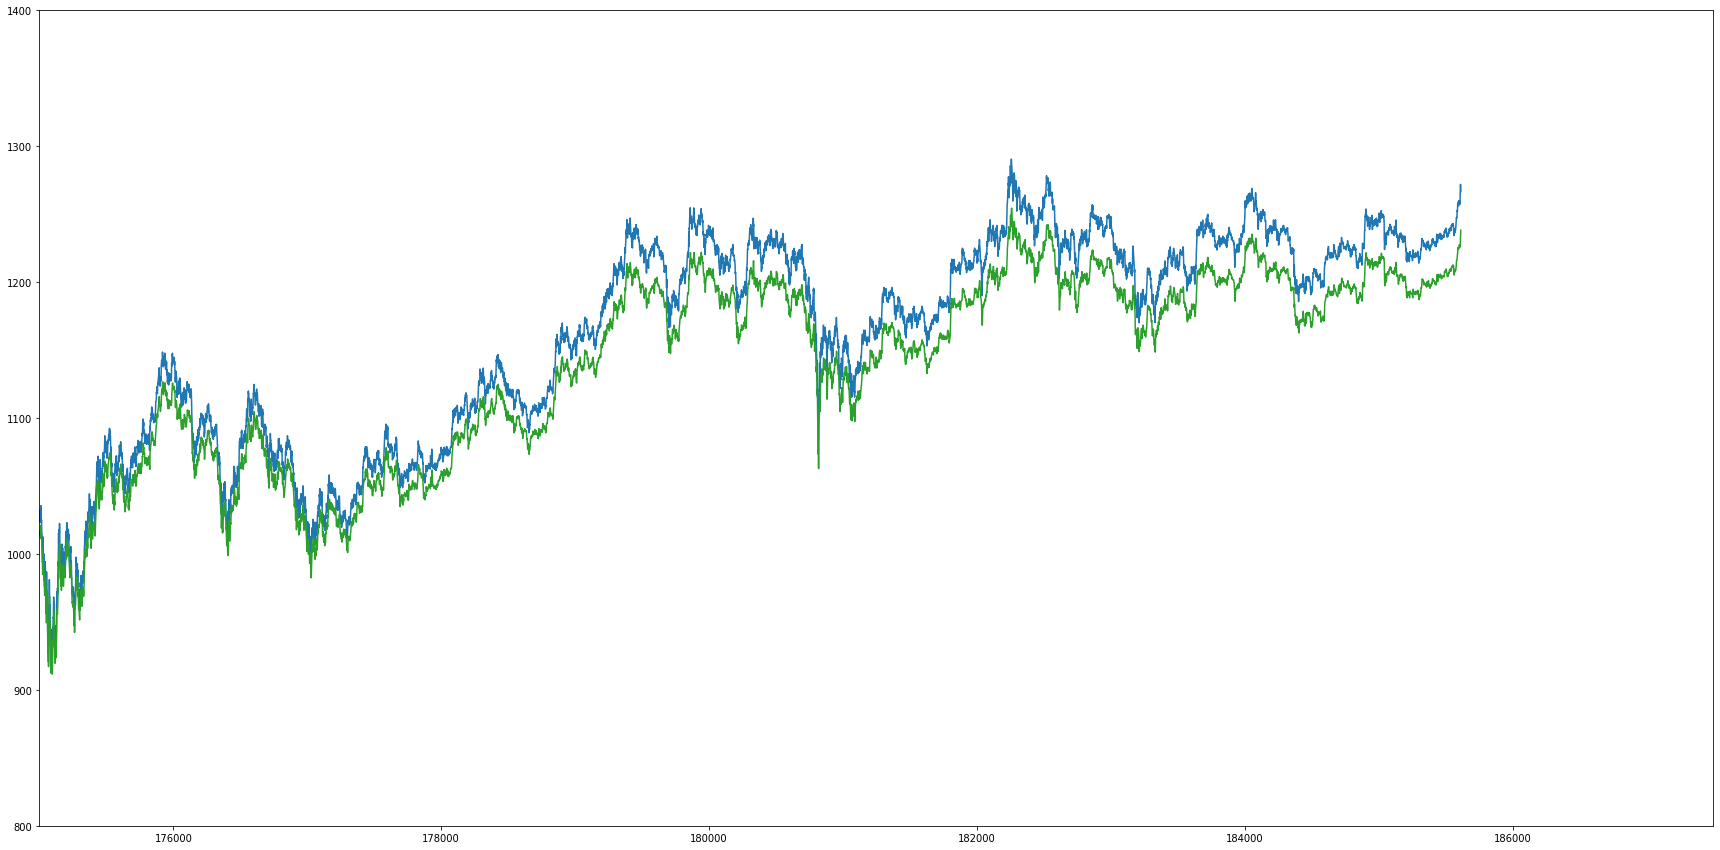

In [34]:
#Zoom in
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([175000,187500,800,1400])
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

37123

In [36]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape
#need to substract look_back days, hours

(1, 100)

In [37]:
#putting them on a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
# demonstrate prediction for next X days, hours = time o/i
lst_output=[]
n_steps=100
i=0
while(i<30): # X days, hours, etc
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       #print("{} time input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} time output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.8904193639755249], [0.8745288252830505], [0.8561042547225952], [0.8385786414146423], [0.8226490020751953], [0.8083671927452087], [0.7955584526062012], [0.7839452624320984], [0.7732290029525757], [0.763146162033081], [0.7534984350204468], [0.7441600561141968], [0.735069215297699], [0.7262128591537476], [0.7176074981689453], [0.7092832326889038], [0.7012706398963928], [0.6935925483703613], [0.6862602829933167], [0.6792728900909424], [0.6726185083389282], [0.6662781834602356], [0.6602277755737305], [0.6544418334960938], [0.6488952040672302], [0.6435649991035461], [0.6384302973747253], [0.6334737539291382], [0.6286798715591431], [0.6240358352661133]]


In [39]:
#predict for the next X days
#manual data
#day_new=np.arange(1,1+n_step)
#day_pred=np.arange(1+n_step,1+n_step+days)

time_new=np.arange(1,101)
time_pred=np.arange(101,131)

In [40]:
len(df1)

185615

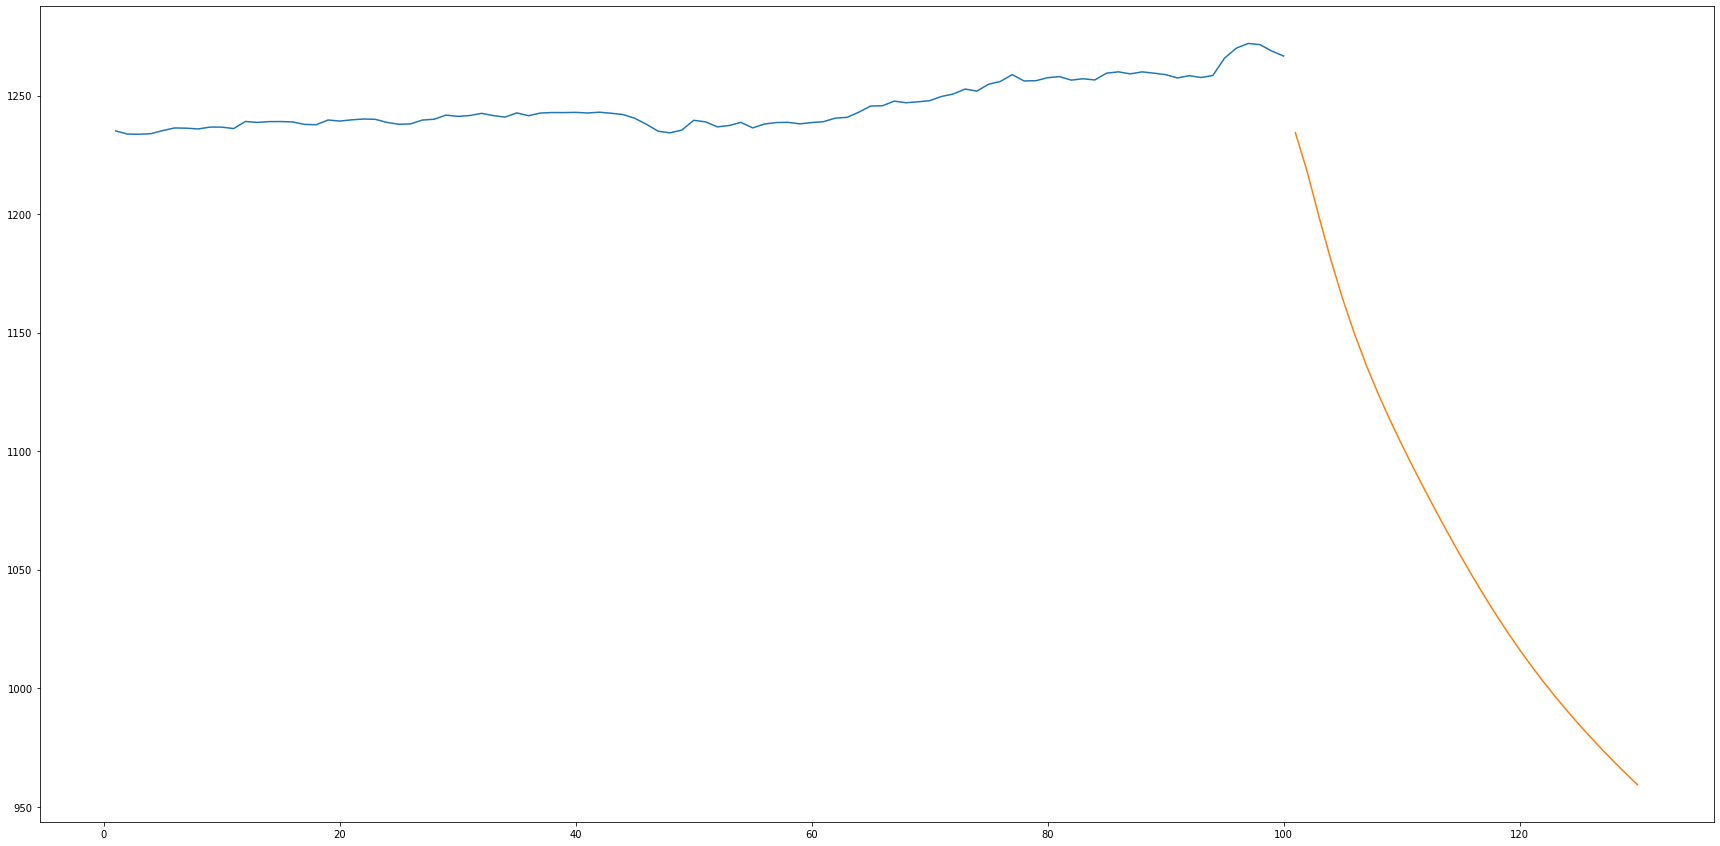

In [41]:
plt.figure(figsize=(30, 15))
plt.plot(time_new,scaler.inverse_transform(df1[(len(df1)-n_steps):]))
plt.plot(time_pred,scaler.inverse_transform(lst_output))
plt.show()

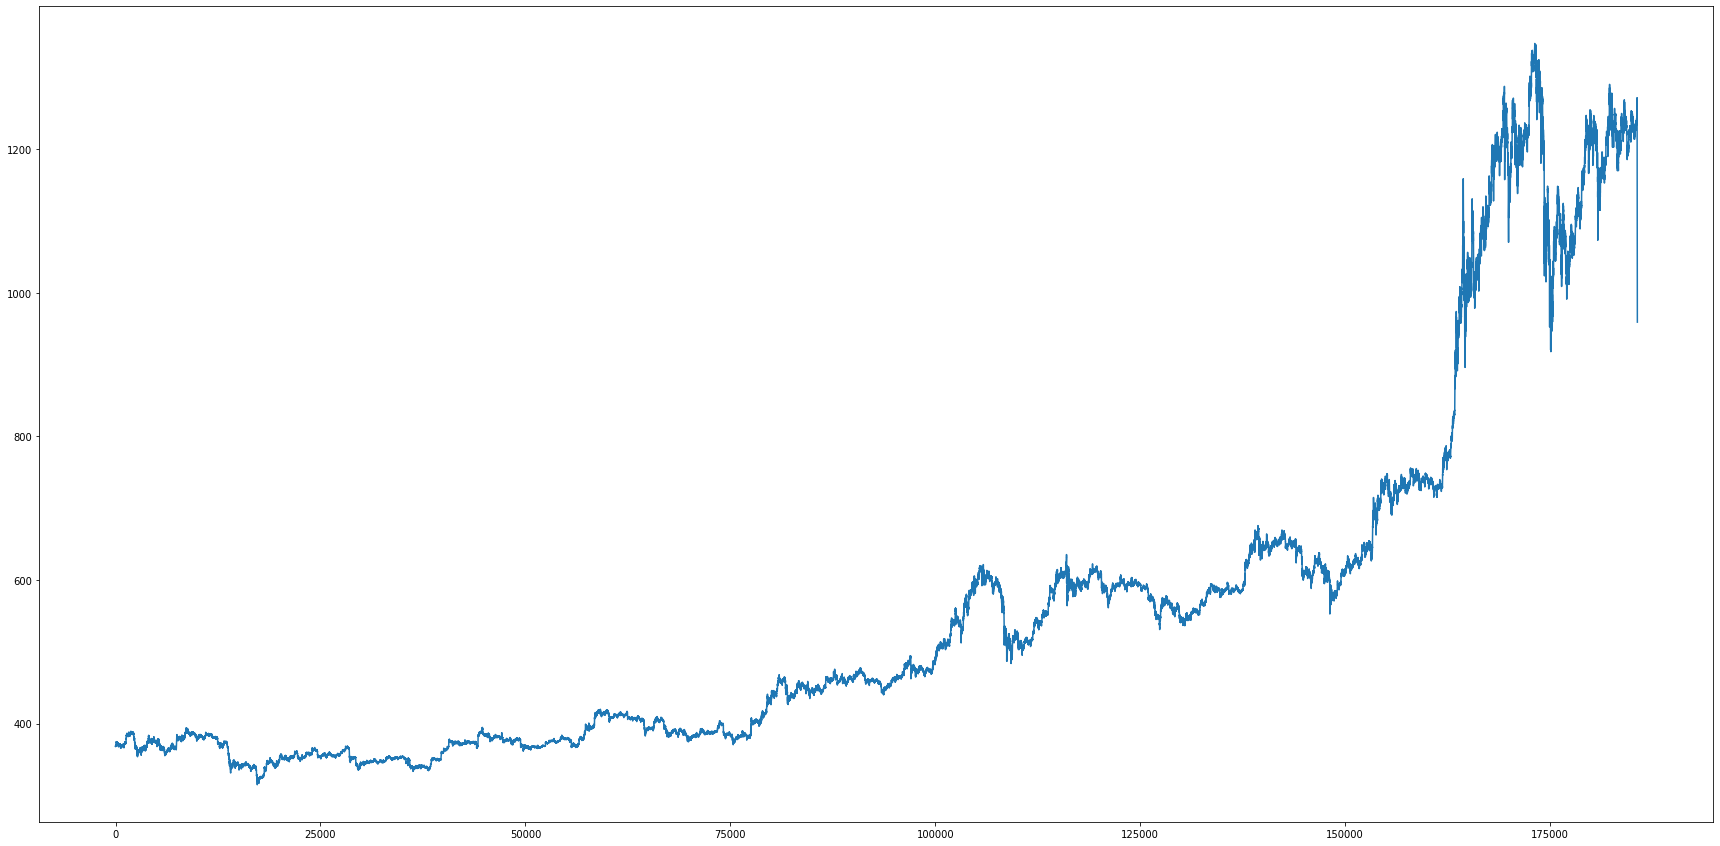

In [42]:
#extend prediction on the graph

df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()

plt.figure(figsize=(30, 15))
plt.plot(df3)
plt.show()

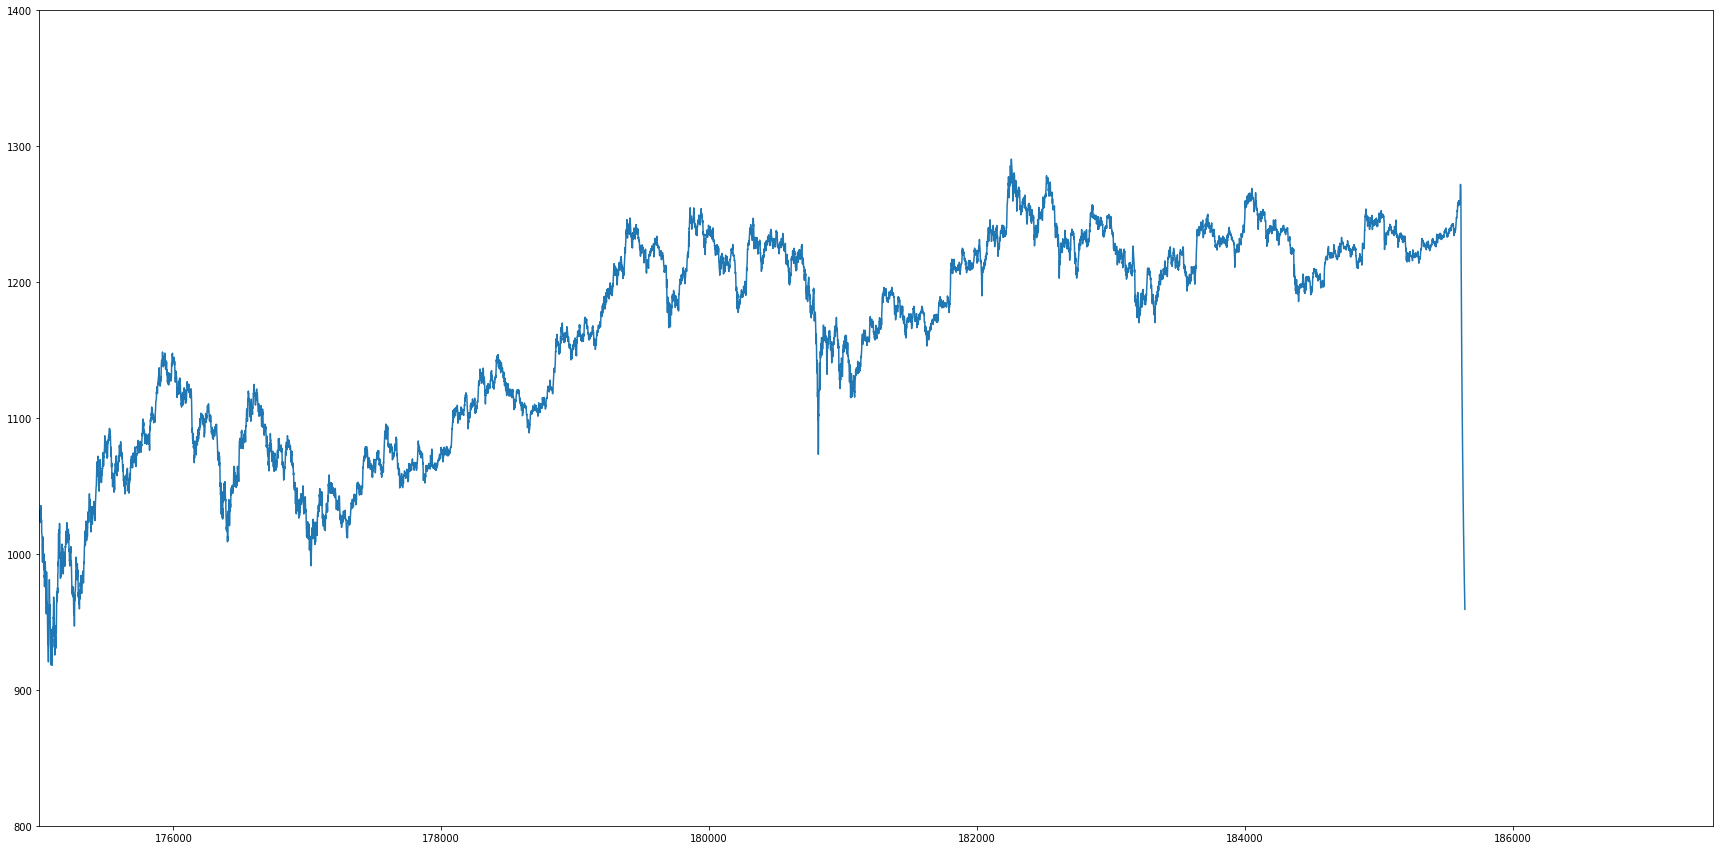

In [43]:
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([175000,187500,800,1400])
plt.plot(df3)
plt.show()

### PART 2 - multy-layer only

In [44]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [45]:
df1=df.reset_index()['close']

In [46]:
# minmax tool. Minmax 0 to -1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [47]:
print(df1)

[[0.05210966]
 [0.05241955]
 [0.05212903]
 ...
 [0.92636278]
 [0.9237481 ]
 [0.92171446]]


In [48]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [49]:
training_size,test_size

(148492, 37123)

In [50]:
#train_data

In [51]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [52]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [53]:
print(X_train.shape), print(y_train.shape)

(148391, 100)
(148391,)


(None, None)

In [54]:
print(X_test.shape), print(ytest.shape)

(37022, 100)
(37022,)


(None, None)

In [55]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [56]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [57]:
#creating LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)               

In [59]:
#fit model into test set and based on parameters (epochs, batch_size and verbose). Those parameters can be optimized

In [60]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=epc,batch_size=64,verbose=1)

# epochs = interaction
# in most cases, an optimal batch-size is 64
# Verbose=0 (silent) Verbose=1 (progress bar)

Epoch 1/10
2319/2319 [==============================] - 961s 410ms/step - loss: 3.7928e-04 - val_loss: 0.0181
Epoch 2/10
2319/2319 [==============================] - 978s 422ms/step - loss: 1.0013e-05 - val_loss: 0.0085
Epoch 3/10
2319/2319 [==============================] - 983s 424ms/step - loss: 7.9968e-06 - val_loss: 0.0060
Epoch 4/10
2319/2319 [==============================] - 983s 424ms/step - loss: 7.5881e-06 - val_loss: 0.0068
Epoch 5/10
2319/2319 [==============================] - 988s 426ms/step - loss: 3.7286e-06 - val_loss: 0.0140
Epoch 6/10
2319/2319 [==============================] - 986s 425ms/step - loss: 3.6694e-06 - val_loss: 0.0134
Epoch 7/10
2319/2319 [==============================] - 986s 425ms/step - loss: 2.9468e-06 - val_loss: 0.0110
Epoch 8/10
2319/2319 [==============================] - 987s 426ms/step - loss: 1.8505e-06 - val_loss: 0.0107
Epoch 9/10
2319/2319 [==============================] - 986s 425ms/step - loss: 1.8234e-06 - val_loss: 0.0094
Epoch 10/1

In [61]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [62]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [63]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

463.0144614880897

In [64]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

899.5168665831798

In [65]:
### Plotting 
# shift train predictions for plotting
look_back=100 #must change in accordance to step_back
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

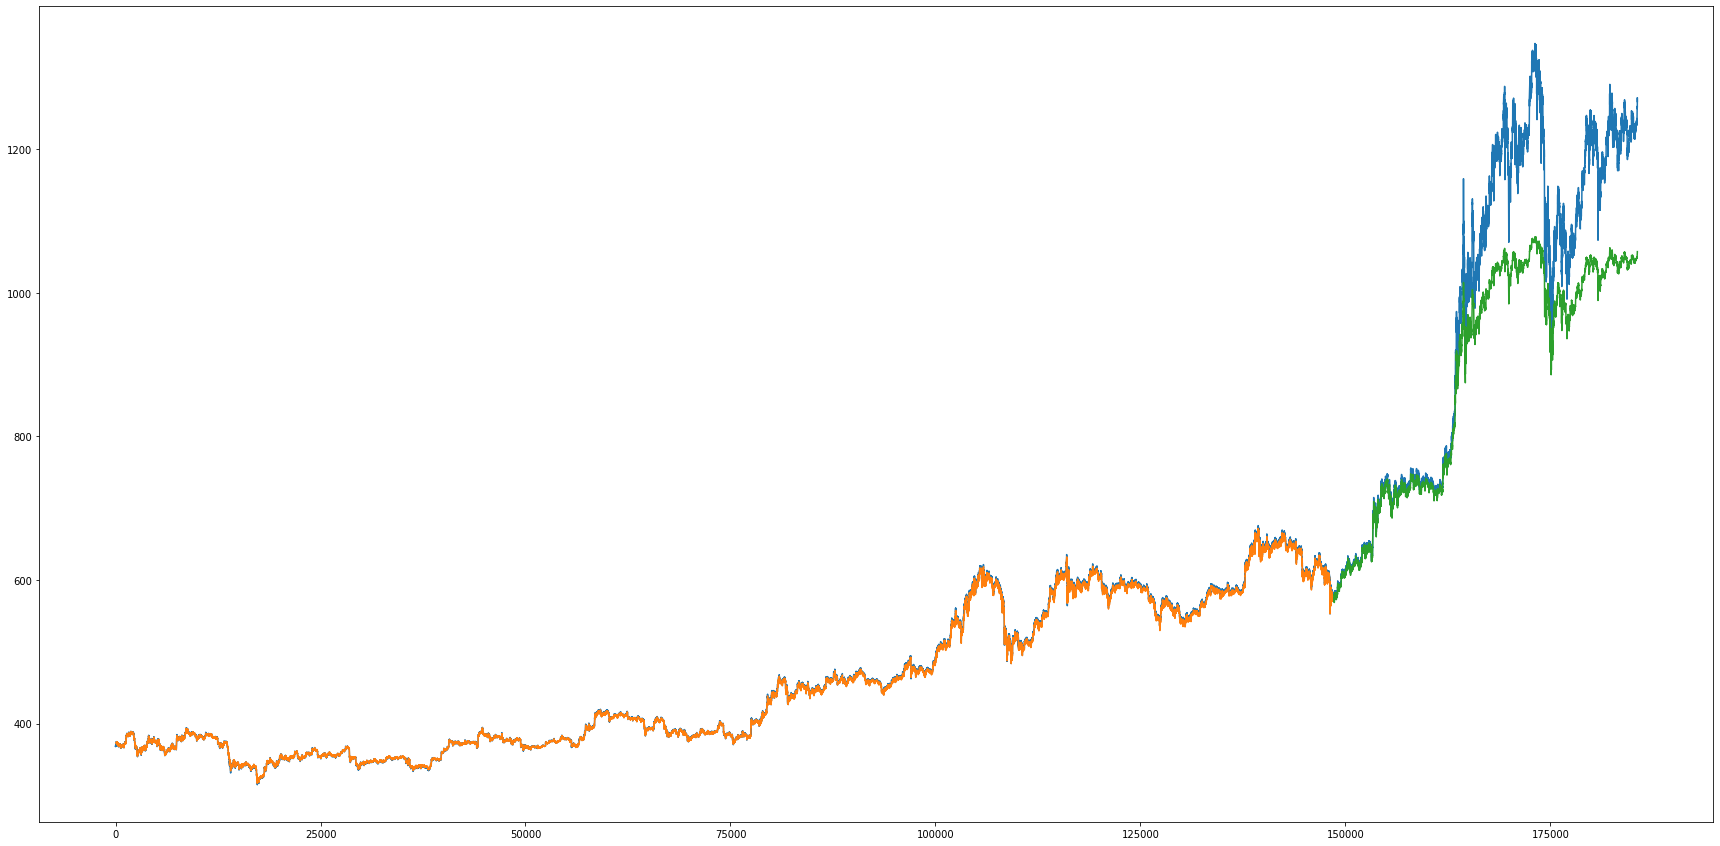

In [66]:
# plot baseline and predictions https://stackabuse.com/change-figure-size-in-matplotlib/
plt.figure(figsize=(30, 15))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

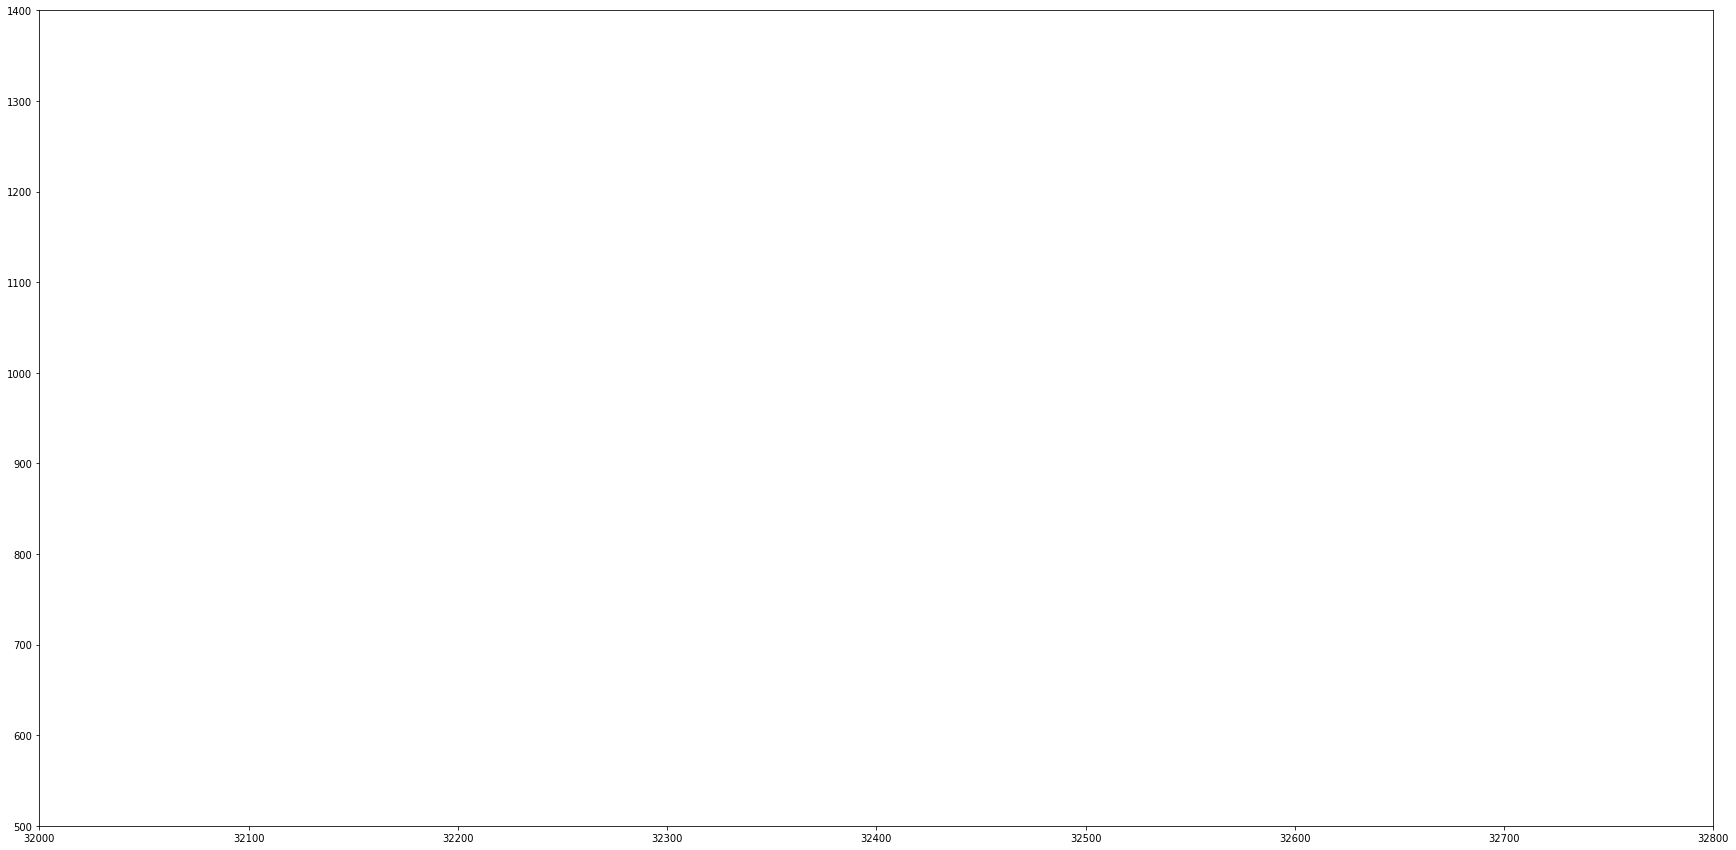

In [67]:
#Zoom in
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([32000,32800,500,1400])
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [68]:
len(test_data)

37123

In [69]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape
#need to substract look_back days, hours

(1, 100)

In [70]:
#putting them on a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [71]:
# demonstrate prediction for next X days, hours = time o/i
lst_output=[]
n_steps=100
i=0
while(i<30): # X days, hours, etc
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       #print("{} time input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} time output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.7190695405006409], [0.6992570757865906], [0.6786221861839294], [0.6641901731491089], [0.6503580808639526], [0.6372740268707275], [0.6259481906890869], [0.6150850057601929], [0.6042400598526001], [0.5936694741249084], [0.5832661390304565], [0.5729090571403503], [0.562633752822876], [0.5524469614028931], [0.5423336625099182], [0.5323060750961304], [0.5223871469497681], [0.5125962495803833], [0.5029571056365967], [0.49349749088287354], [0.4842429757118225], [0.47522008419036865], [0.46645236015319824], [0.45796263217926025], [0.4497717618942261], [0.44189614057540894], [0.4343506097793579], [0.4271441698074341], [0.4202844500541687], [0.4137744903564453]]


In [72]:
#predict for the next X days
#manual data
#day_new=np.arange(1,1+n_step)
#day_pred=np.arange(1+n_step,1+n_step+days)

time_new=np.arange(1,101)
time_pred=np.arange(101,131)

In [73]:
len(df1)

185615

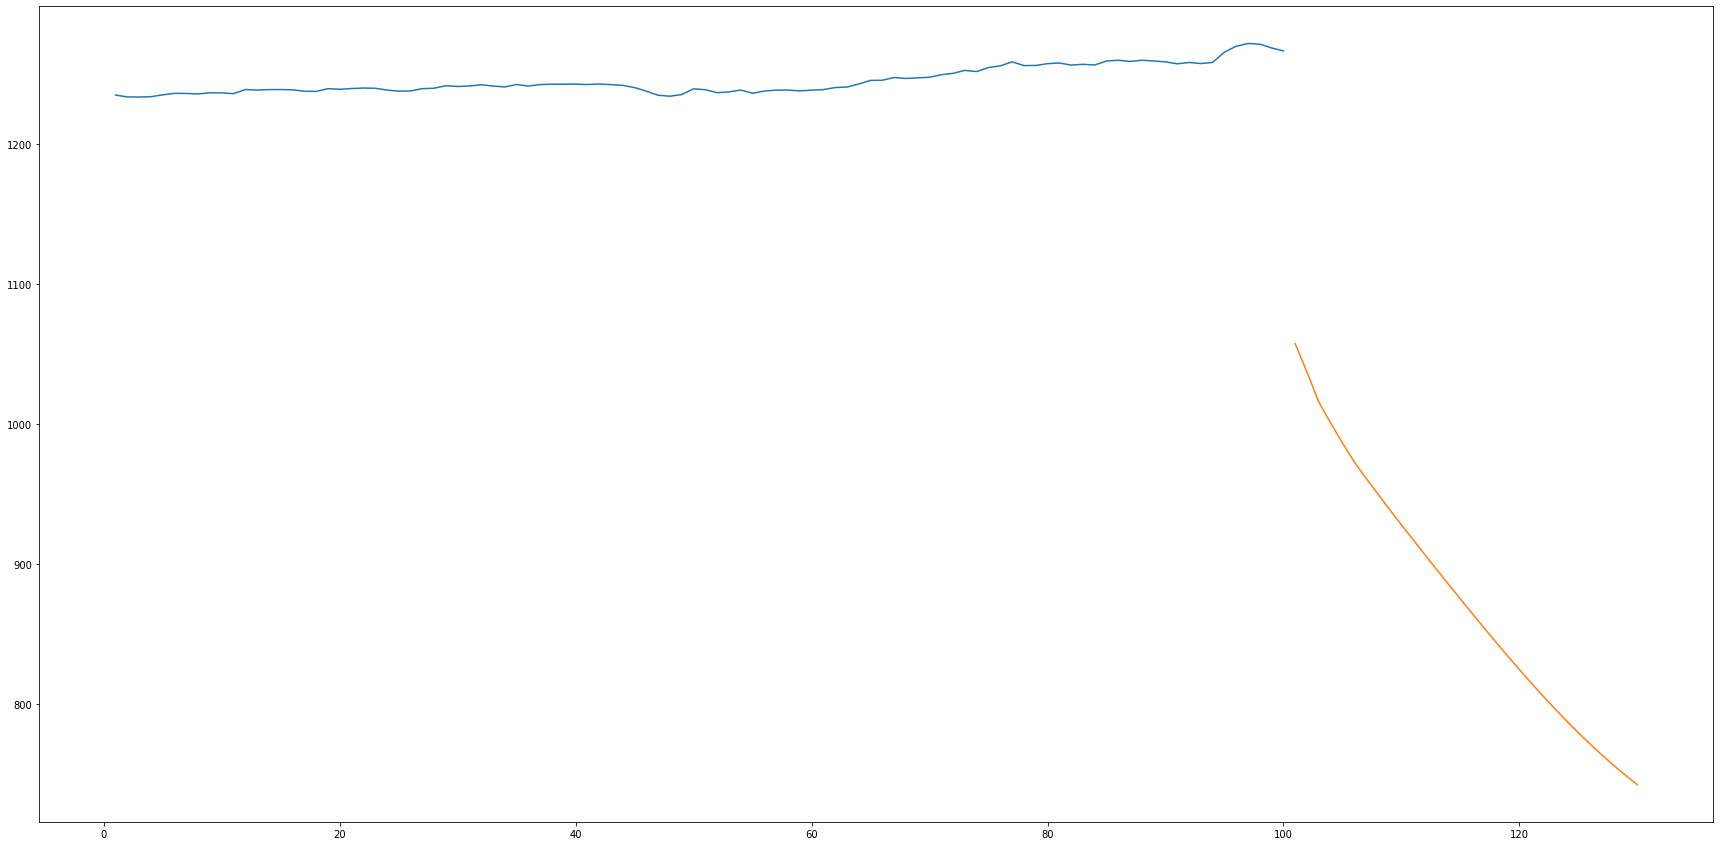

In [74]:
plt.figure(figsize=(30, 15))
plt.plot(time_new,scaler.inverse_transform(df1[(len(df1)-n_steps):]))
plt.plot(time_pred,scaler.inverse_transform(lst_output))
plt.show()

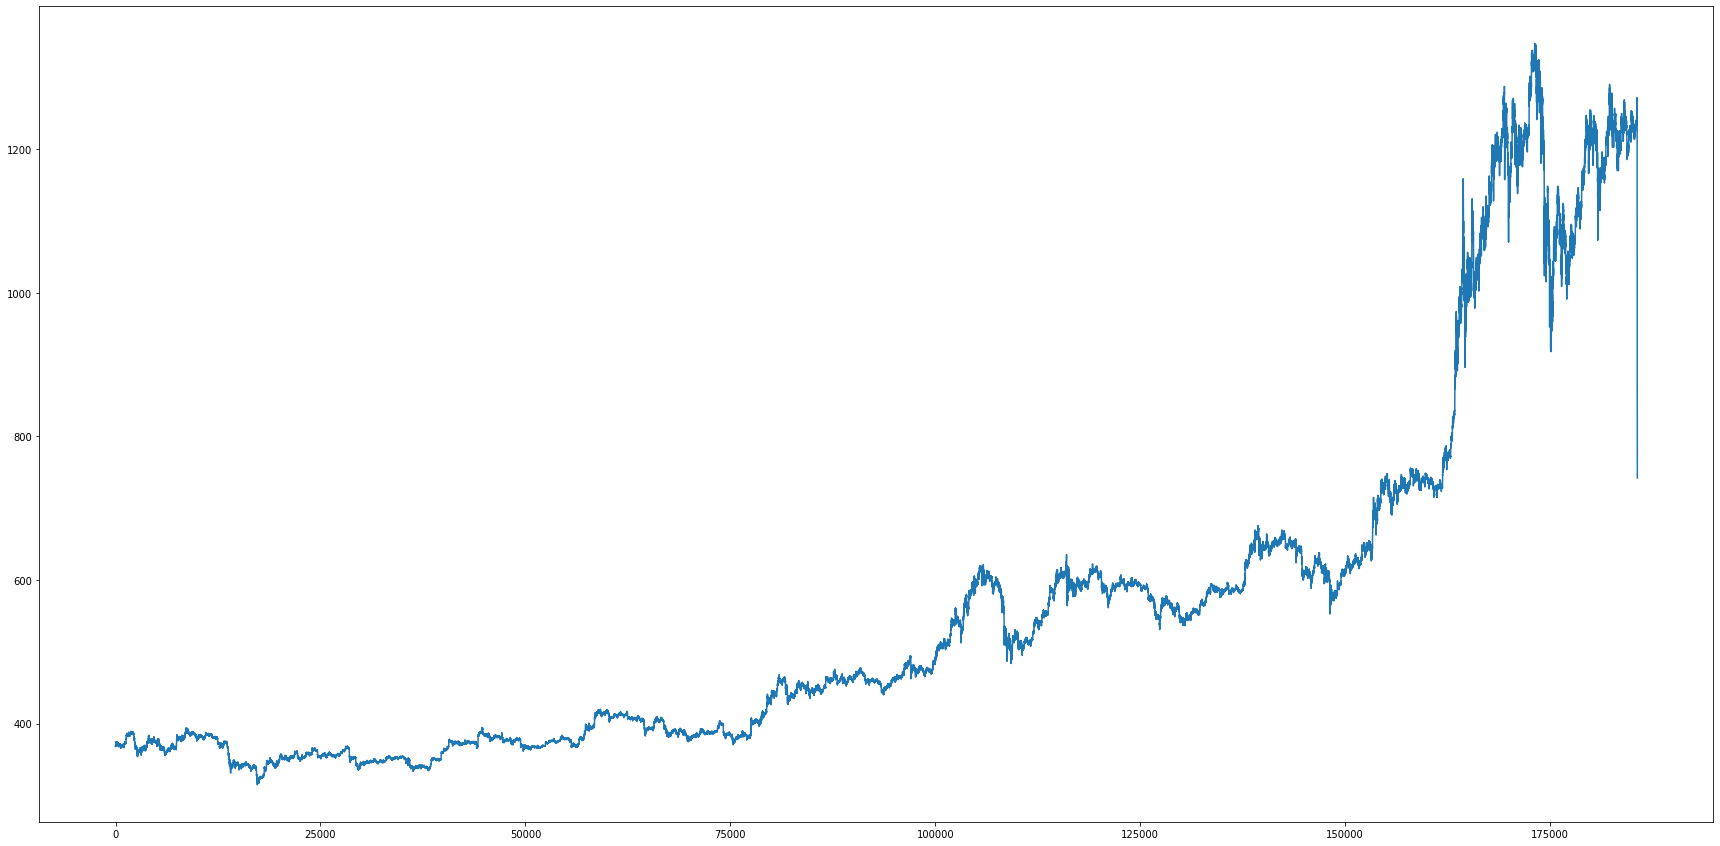

In [75]:
#extend prediction on the graph

df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()

plt.figure(figsize=(30, 15))
plt.plot(df3)
plt.show()

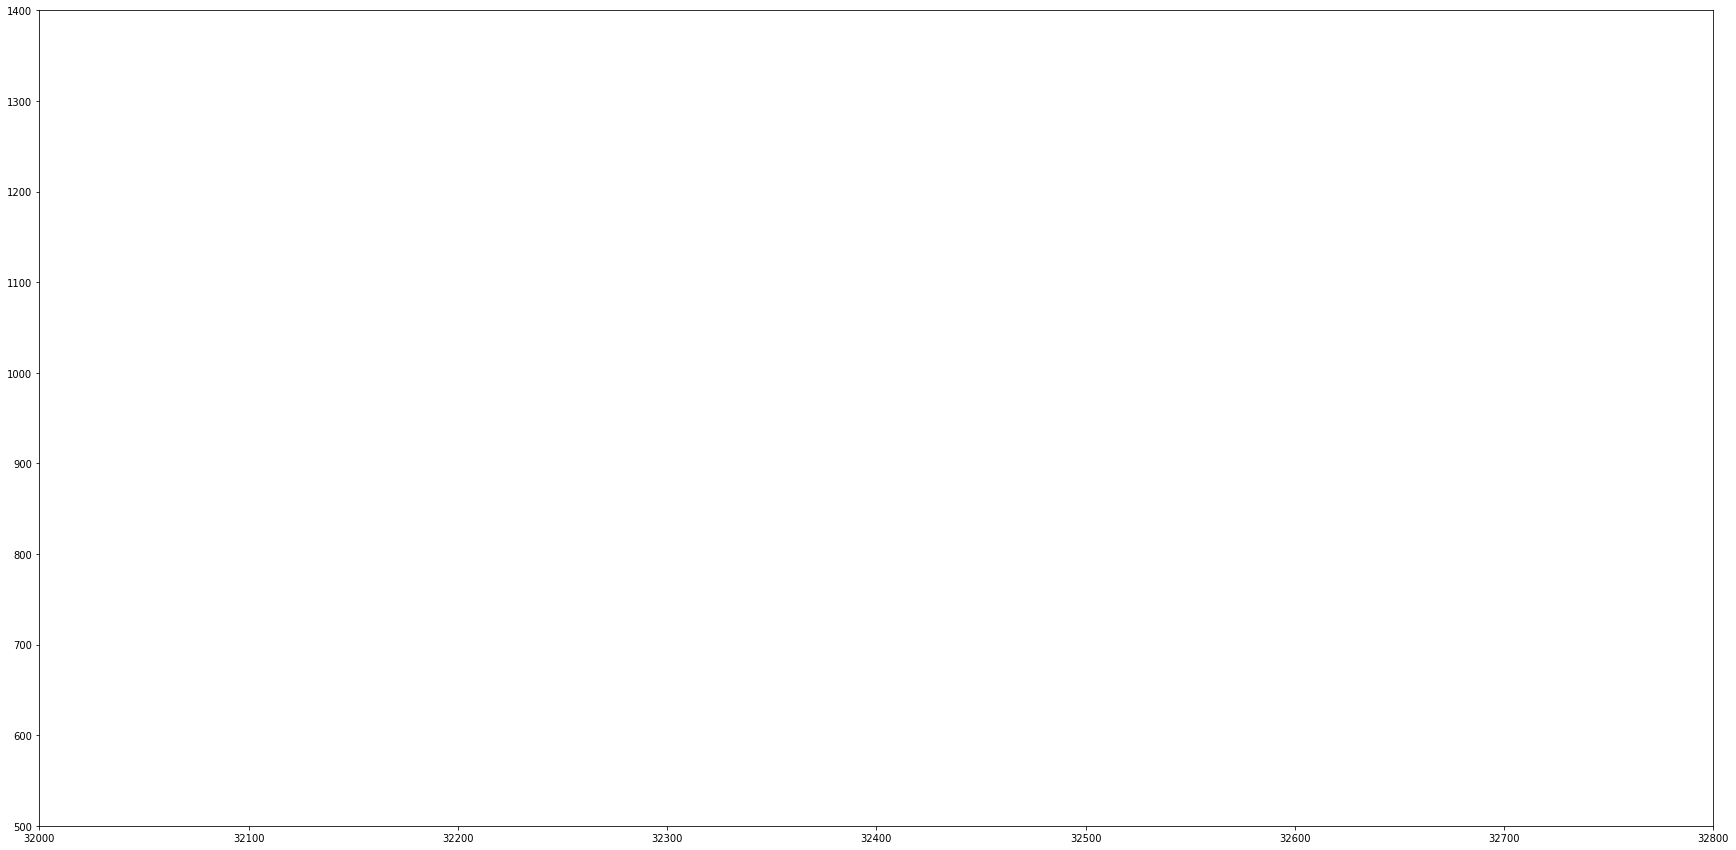

In [76]:
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([32000,32800,500,1400])
plt.plot(df3)
plt.show()

### PART 3 - Bidirectional

In [77]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [78]:
df1=df.reset_index()['close']

In [79]:
# minmax tool. Minmax 0 to -1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [80]:
print(df1)

[[0.05210966]
 [0.05241955]
 [0.05212903]
 ...
 [0.92636278]
 [0.9237481 ]
 [0.92171446]]


In [81]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [82]:
training_size,test_size

(148492, 37123)

In [83]:
#train_data

In [84]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [85]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [86]:
print(X_train.shape), print(y_train.shape)

(148391, 100)
(148391,)


(None, None)

In [87]:
print(X_test.shape), print(ytest.shape)

(37022, 100)
(37022,)


(None, None)

In [88]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [89]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [90]:
#creating LSTM

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(100, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100)               20800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100)               20800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [92]:
#fit model into test set and based on parameters (epochs, batch_size and verbose). Those parameters can be optimized

In [93]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=epc,batch_size=64,verbose=1)

# epochs = interaction
# in most cases, an optimal batch-size is 64
# Verbose=0 (silent) Verbose=1 (progress bar)

Epoch 1/10
2319/2319 [==============================] - 194s 83ms/step - loss: 7.9987e-04 - val_loss: 125693468672.0000
Epoch 2/10
2319/2319 [==============================] - 187s 81ms/step - loss: 2.9426e-06 - val_loss: 41284.4258
Epoch 3/10
2319/2319 [==============================] - 188s 81ms/step - loss: 1.6200e-06 - val_loss: 0.0096
Epoch 4/10
2319/2319 [==============================] - 187s 81ms/step - loss: 1.3322e-06 - val_loss: 0.0023
Epoch 5/10
2319/2319 [==============================] - 188s 81ms/step - loss: 1.0645e-06 - val_loss: 4.7919e-04
Epoch 6/10
2319/2319 [==============================] - 188s 81ms/step - loss: 8.8983e-07 - val_loss: 3.1671e-04
Epoch 7/10
2319/2319 [==============================] - 187s 81ms/step - loss: 9.2801e-07 - val_loss: 1.5761e-04
Epoch 8/10
2319/2319 [==============================] - 187s 81ms/step - loss: 7.1831e-07 - val_loss: 6.7656e-05
Epoch 9/10
2319/2319 [==============================] - 187s 81ms/step - loss: 6.8977e-07 - val_l

In [94]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [95]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [96]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

463.92202552319884

In [97]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1004.1137528567564

In [98]:
### Plotting 
# shift train predictions for plotting
look_back=100 #must change in accordance to step_back
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

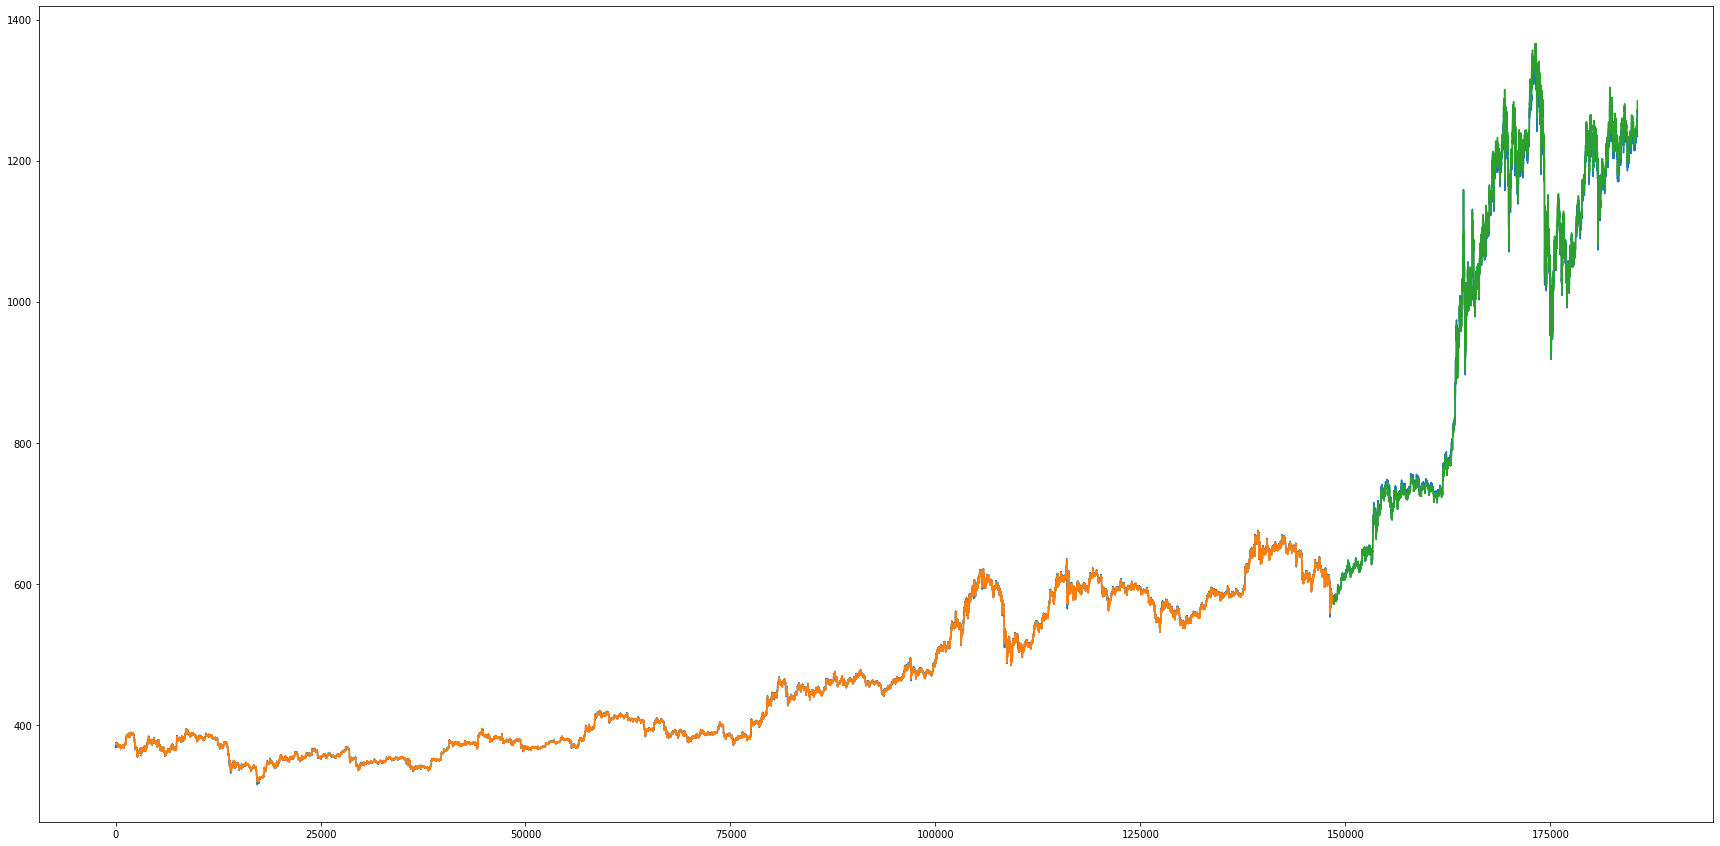

In [99]:
# plot baseline and predictions https://stackabuse.com/change-figure-size-in-matplotlib/
plt.figure(figsize=(30, 15))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

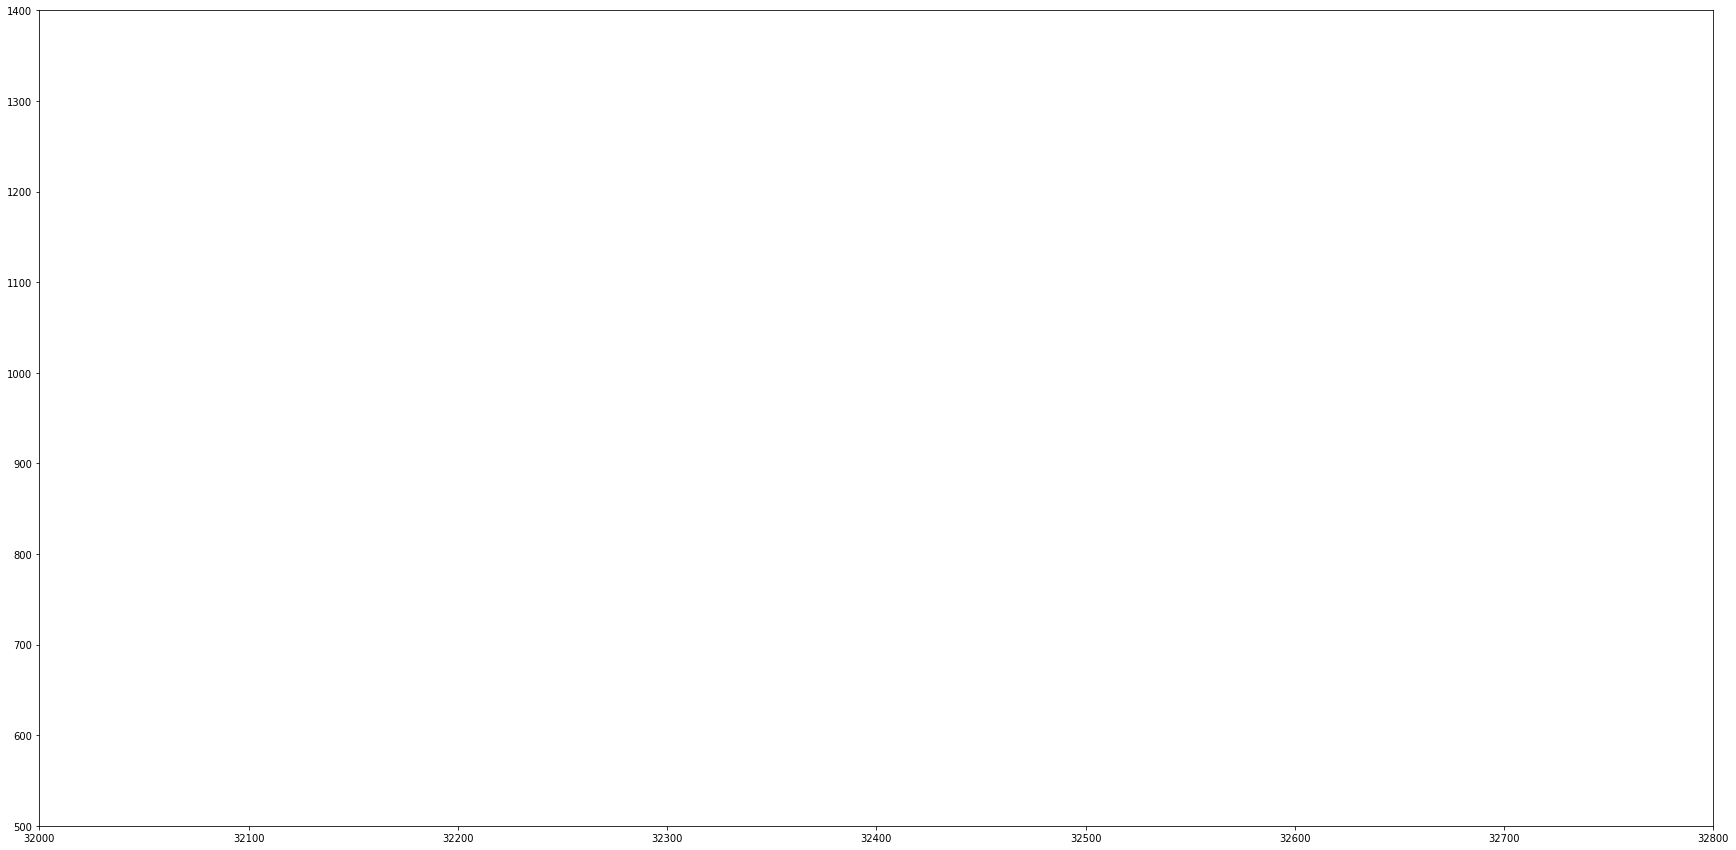

In [100]:
#Zoom in
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([32000,32800,500,1400])
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [101]:
len(test_data)

37123

In [102]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape
#need to substract look_back days, hours

(1, 100)

In [103]:
#putting them on a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [104]:
# demonstrate prediction for next X days, hours = time o/i
lst_output=[]
n_steps=100
i=0
while(i<30): # X days, hours, etc
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       #print("{} time input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} time output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.93620365858078], [0.9428026080131531], [0.9504996538162231], [0.9593378305435181], [0.9691956043243408], [0.9799727201461792], [0.991613507270813], [1.0041033029556274], [1.0174607038497925], [1.031731128692627], [1.0469865798950195], [1.063324213027954], [1.0808559656143188], [1.0997250080108643], [1.1200958490371704], [1.1421617269515991], [1.1661502122879028], [1.1923214197158813], [1.220994234085083], [1.2525471448898315], [1.2874425649642944], [1.326238751411438], [1.3696221113204956], [1.418443202972412], [1.4737664461135864], [1.5369367599487305], [1.6096774339675903], [1.6941837072372437], [1.7933669090270996], [1.911110758781433]]


In [105]:
#predict for the next X days
#manual data
#day_new=np.arange(1,1+n_step)
#day_pred=np.arange(1+n_step,1+n_step+days)

time_new=np.arange(1,101)
time_pred=np.arange(101,131)

In [106]:
len(df1)

185615

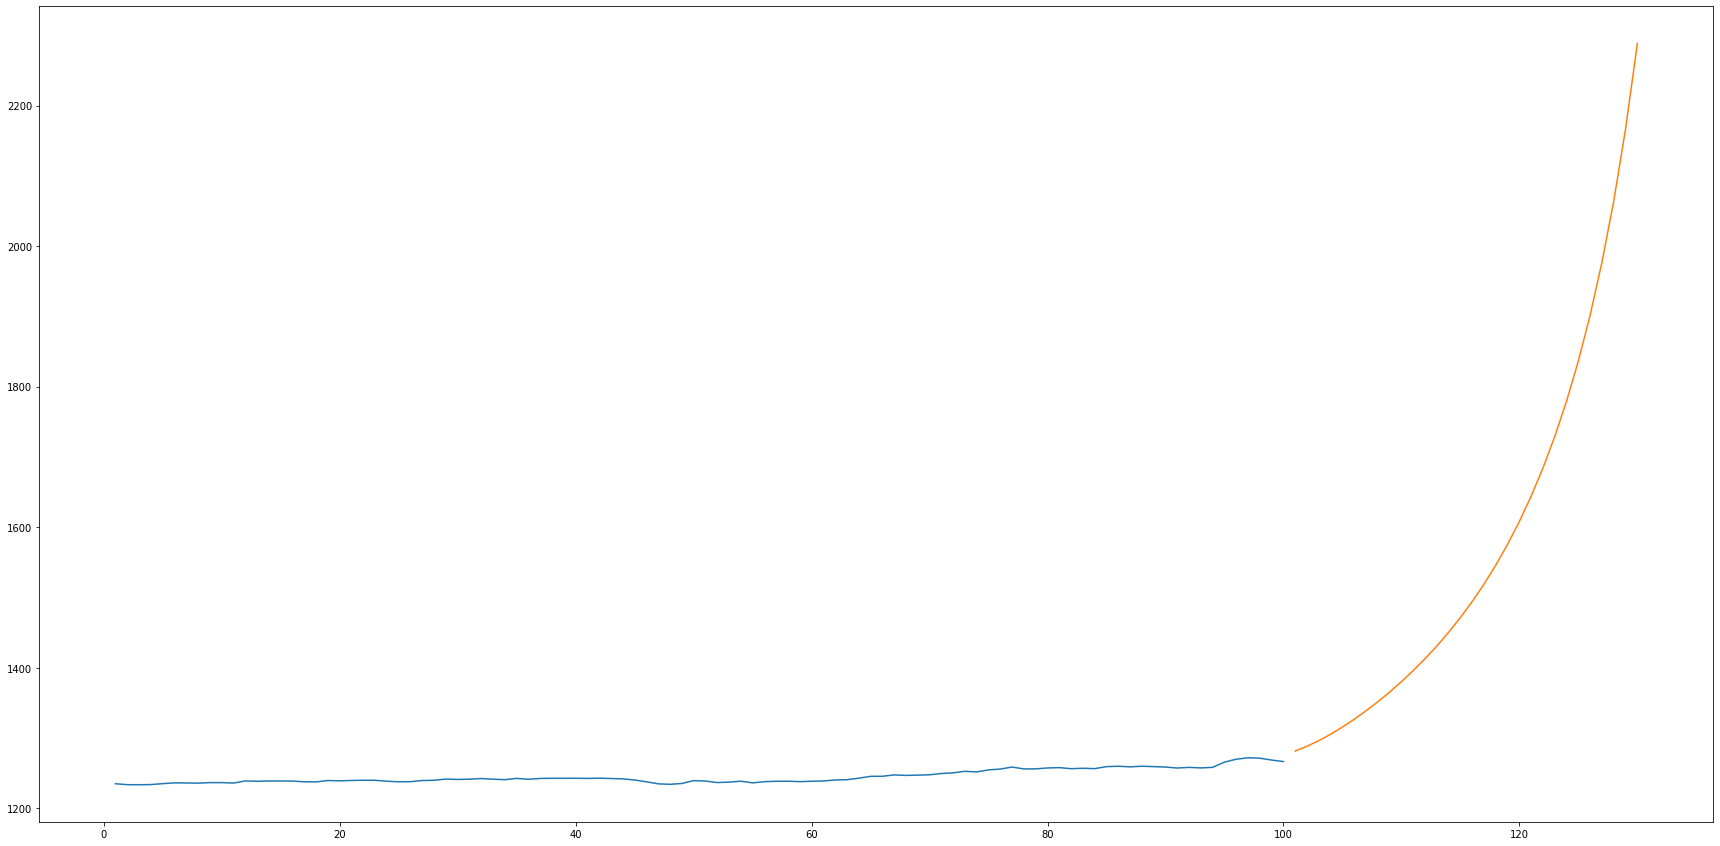

In [107]:
plt.figure(figsize=(30, 15))
plt.plot(time_new,scaler.inverse_transform(df1[(len(df1)-n_steps):]))
plt.plot(time_pred,scaler.inverse_transform(lst_output))
plt.show()

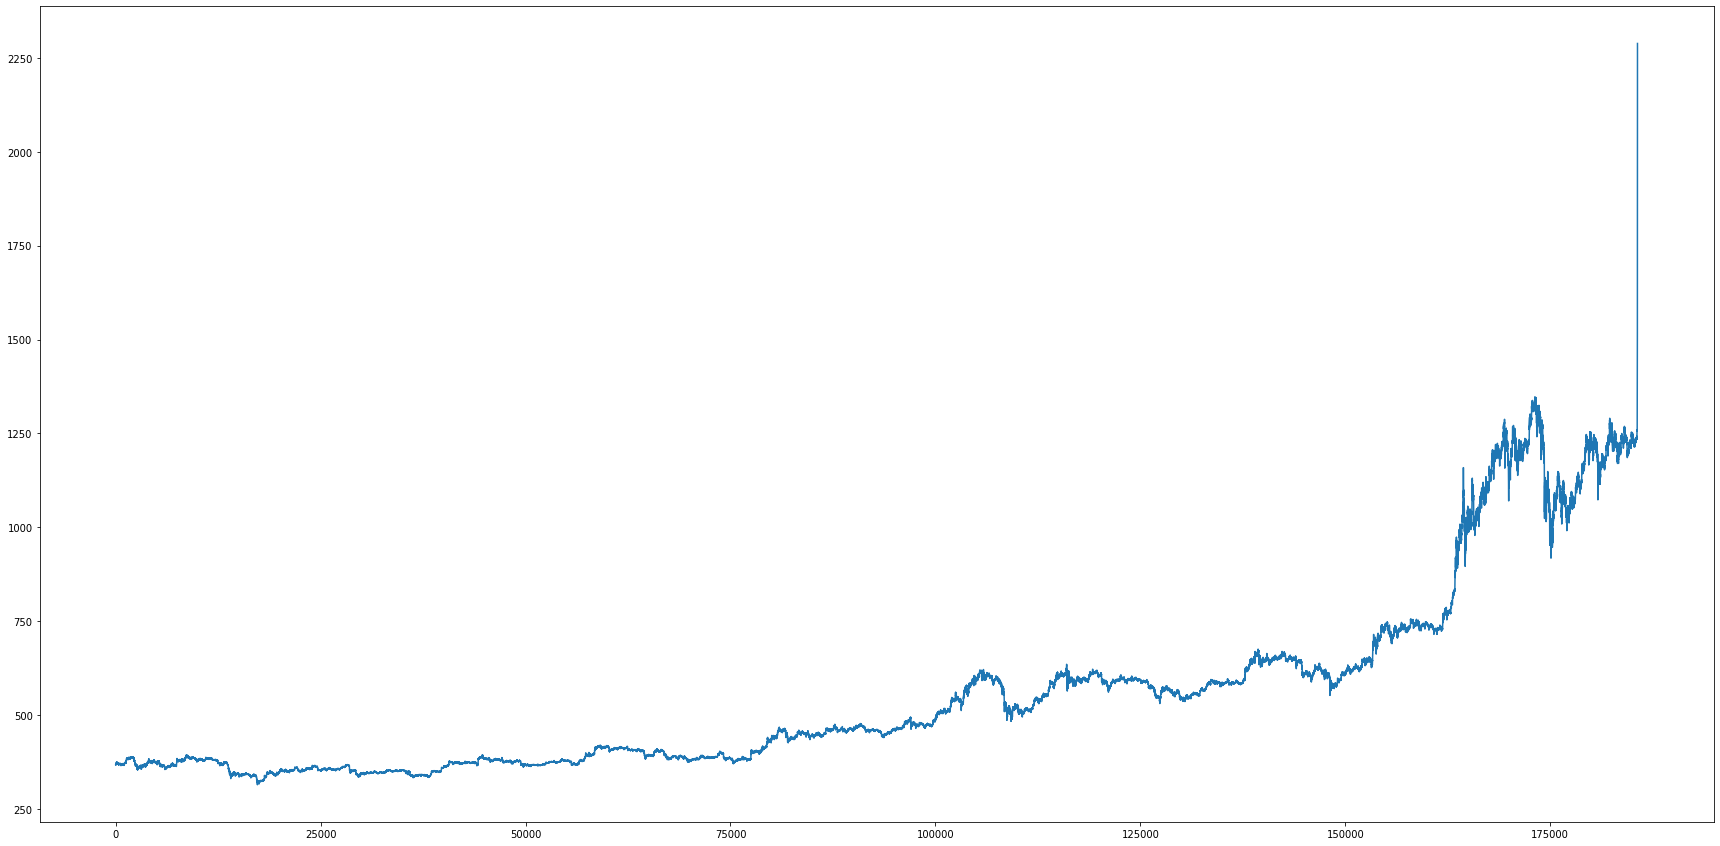

In [108]:
#extend prediction on the graph

df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()

plt.figure(figsize=(30, 15))
plt.plot(df3)
plt.show()

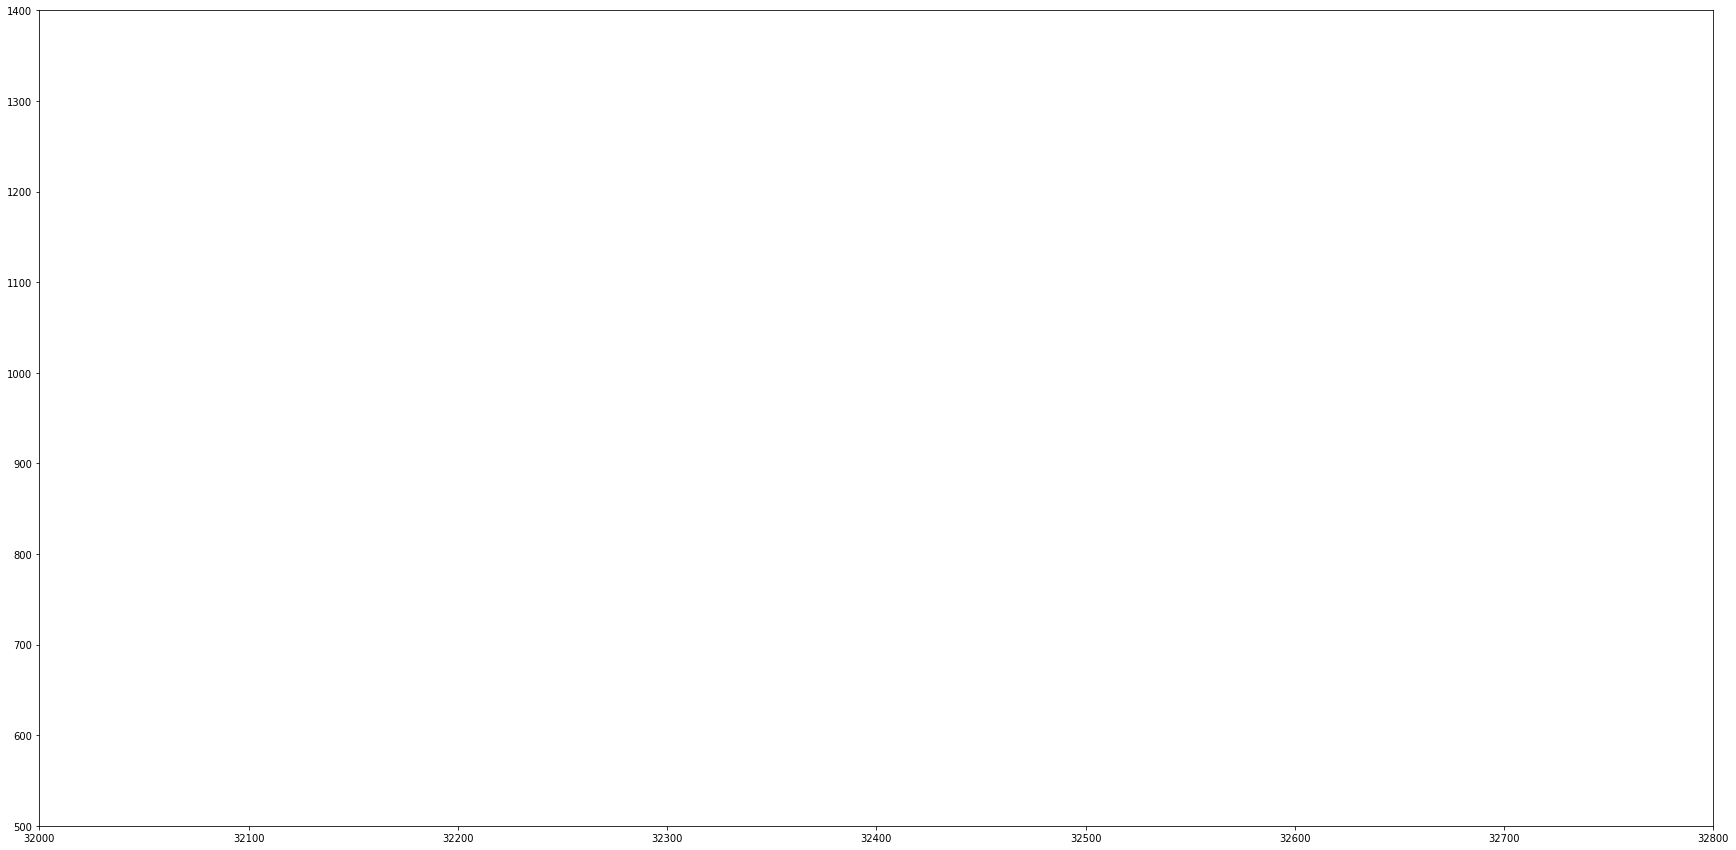

In [109]:
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([32000,32800,500,1400])
plt.plot(df3)
plt.show()

### PART 4 - Multilayer + Relu

In [110]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [111]:
df1=df.reset_index()['close']

In [112]:
# minmax tool. Minmax 0 to -1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [113]:
print(df1)

[[0.05210966]
 [0.05241955]
 [0.05212903]
 ...
 [0.92636278]
 [0.9237481 ]
 [0.92171446]]


In [114]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [115]:
training_size,test_size

(148492, 37123)

In [116]:
#train_data

In [117]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [118]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [119]:
print(X_train.shape), print(y_train.shape)

(148391, 100)
(148391,)


(None, None)

In [120]:
print(X_test.shape), print(ytest.shape)

(37022, 100)
(37022,)


(None, None)

In [121]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [122]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [123]:
#creating LSTM

model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100, 200)          161600    
_________________________________________________________________
lstm_12 (LSTM)               (None, 100, 100)          120400    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           30200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [124]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100, 200)          161600    
_________________________________________________________________
lstm_12 (LSTM)               (None, 100, 100)          120400    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           30200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [125]:
#fit model into test set and based on parameters (epochs, batch_size and verbose). Those parameters can be optimized

In [126]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=epc,batch_size=64,verbose=1)

# epochs = interaction
# in most cases, an optimal batch-size is 64
# Verbose=0 (silent) Verbose=1 (progress bar)

Epoch 1/10
2319/2319 [==============================] - 1372s 590ms/step - loss: 6.4588e-04 - val_loss: 0.0318
Epoch 2/10
2319/2319 [==============================] - 1367s 589ms/step - loss: 6.9479e-06 - val_loss: 0.0108
Epoch 3/10
2319/2319 [==============================] - 1367s 589ms/step - loss: 5.6449e-06 - val_loss: 0.0015
Epoch 4/10
2319/2319 [==============================] - 1370s 591ms/step - loss: 4.4340e-06 - val_loss: 8.3766e-04
Epoch 5/10
2319/2319 [==============================] - 1369s 590ms/step - loss: 3.4268e-06 - val_loss: 0.0025
Epoch 6/10
2319/2319 [==============================] - 1371s 591ms/step - loss: 3.3572e-06 - val_loss: 0.0155
Epoch 7/10
2319/2319 [==============================] - 1371s 591ms/step - loss: 2.6039e-06 - val_loss: 0.0438
Epoch 8/10
2319/2319 [==============================] - 1375s 593ms/step - loss: 2.8882e-06 - val_loss: 0.0674
Epoch 9/10
2319/2319 [==============================] - 1373s 592ms/step - loss: 2.1865e-06 - val_loss: 0.15

In [127]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [128]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [129]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

464.3558234404418

In [130]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1372.7343358000157

In [131]:
### Plotting 
# shift train predictions for plotting
look_back=100 #must change in accordance to step_back
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

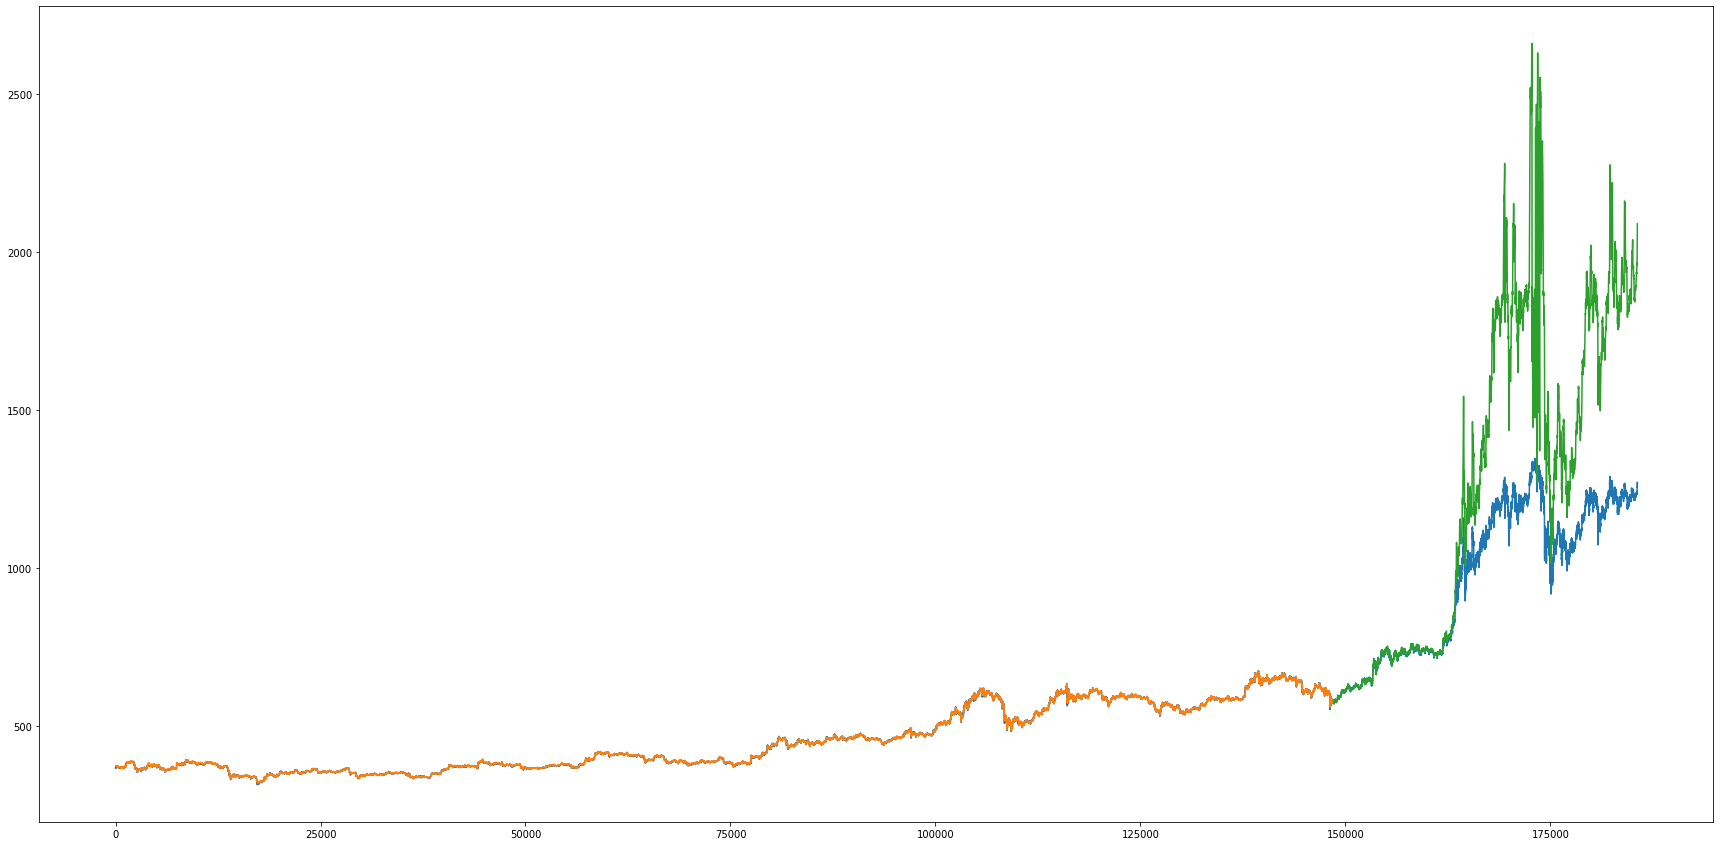

In [132]:
# plot baseline and predictions https://stackabuse.com/change-figure-size-in-matplotlib/
plt.figure(figsize=(30, 15))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

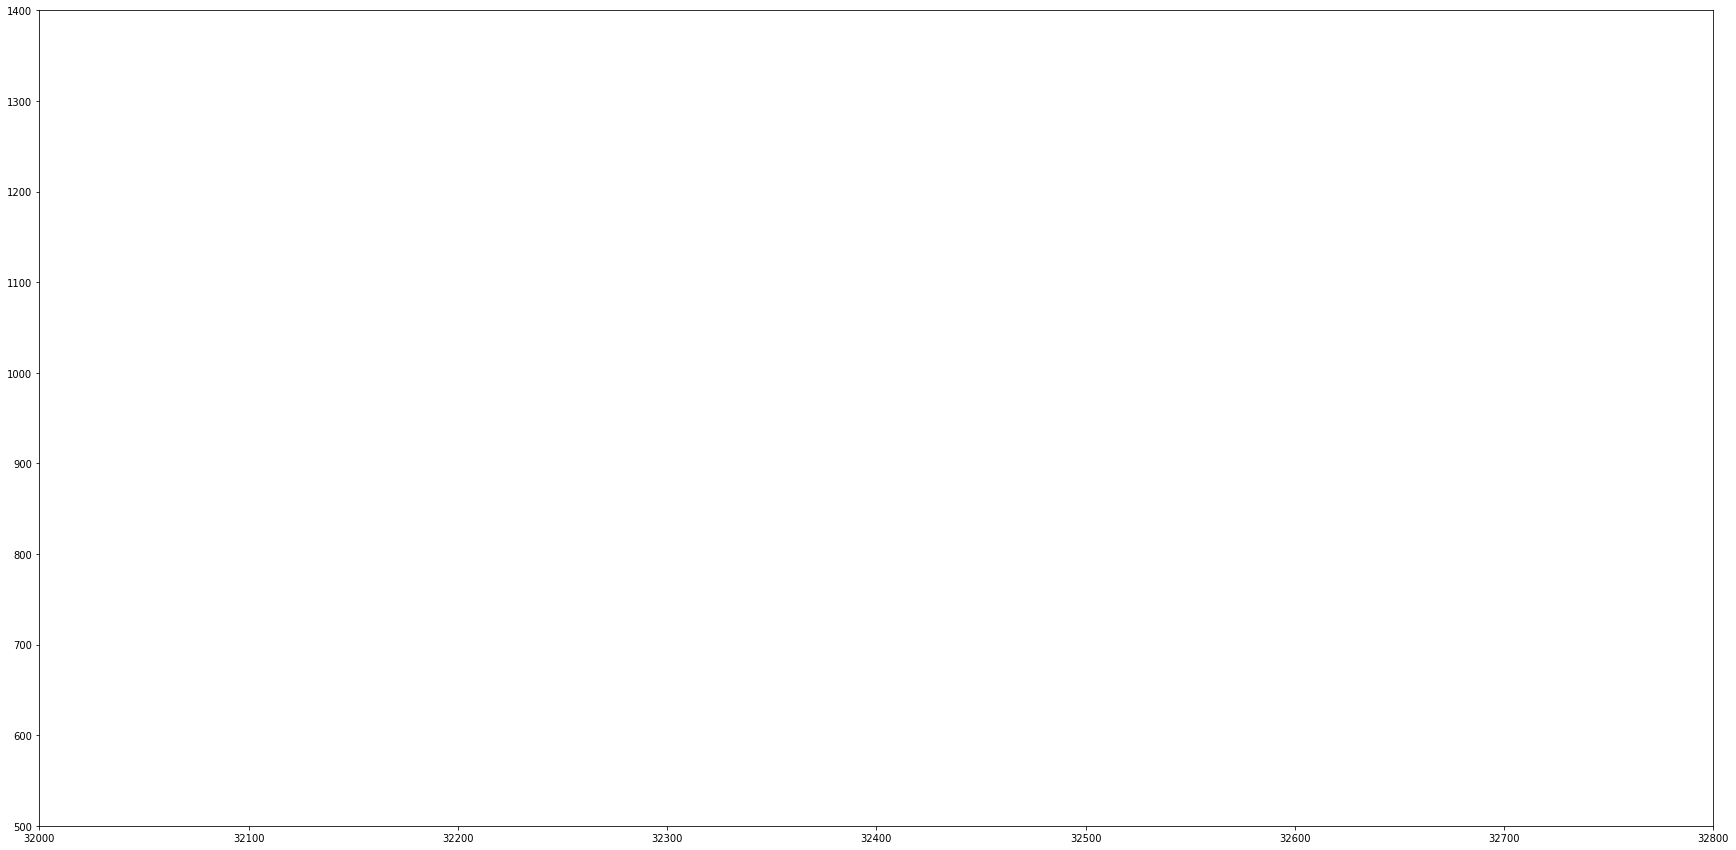

In [133]:
#Zoom in
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([32000,32800,500,1400])
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [134]:
len(test_data)

37123

In [135]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape
#need to substract look_back days, hours

(1, 100)

In [136]:
#putting them on a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [137]:
# demonstrate prediction for next X days, hours = time o/i
lst_output=[]
n_steps=100
i=0
while(i<30): # X days, hours, etc
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       #print("{} time input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} time output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[1.7322875261306763], [1.907467007637024], [2.4035770893096924], [3.201159715652466], [4.507155895233154], [6.849816799163818], [12.346820831298828], [27.502904891967773], [79.62242889404297], [272.05267333984375], [985.9696655273438], [3668.960205078125], [13920.79296875], [52999.23046875], [202316.359375], [772932.9375], [2953686.5], [11288143.0], [43141180.0], [164878912.0], [630143360.0], [2408318720.0], [9204254720.0], [35177369600.0], [134442975232.0], [513822195712.0], [1963756224512.0], [7505201070080.0], [28683821645824.0], [109625550569472.0]]


In [138]:
#predict for the next X days
#manual data
#day_new=np.arange(1,1+n_step)
#day_pred=np.arange(1+n_step,1+n_step+days)

time_new=np.arange(1,101)
time_pred=np.arange(101,131)

In [139]:
len(df1)

185615

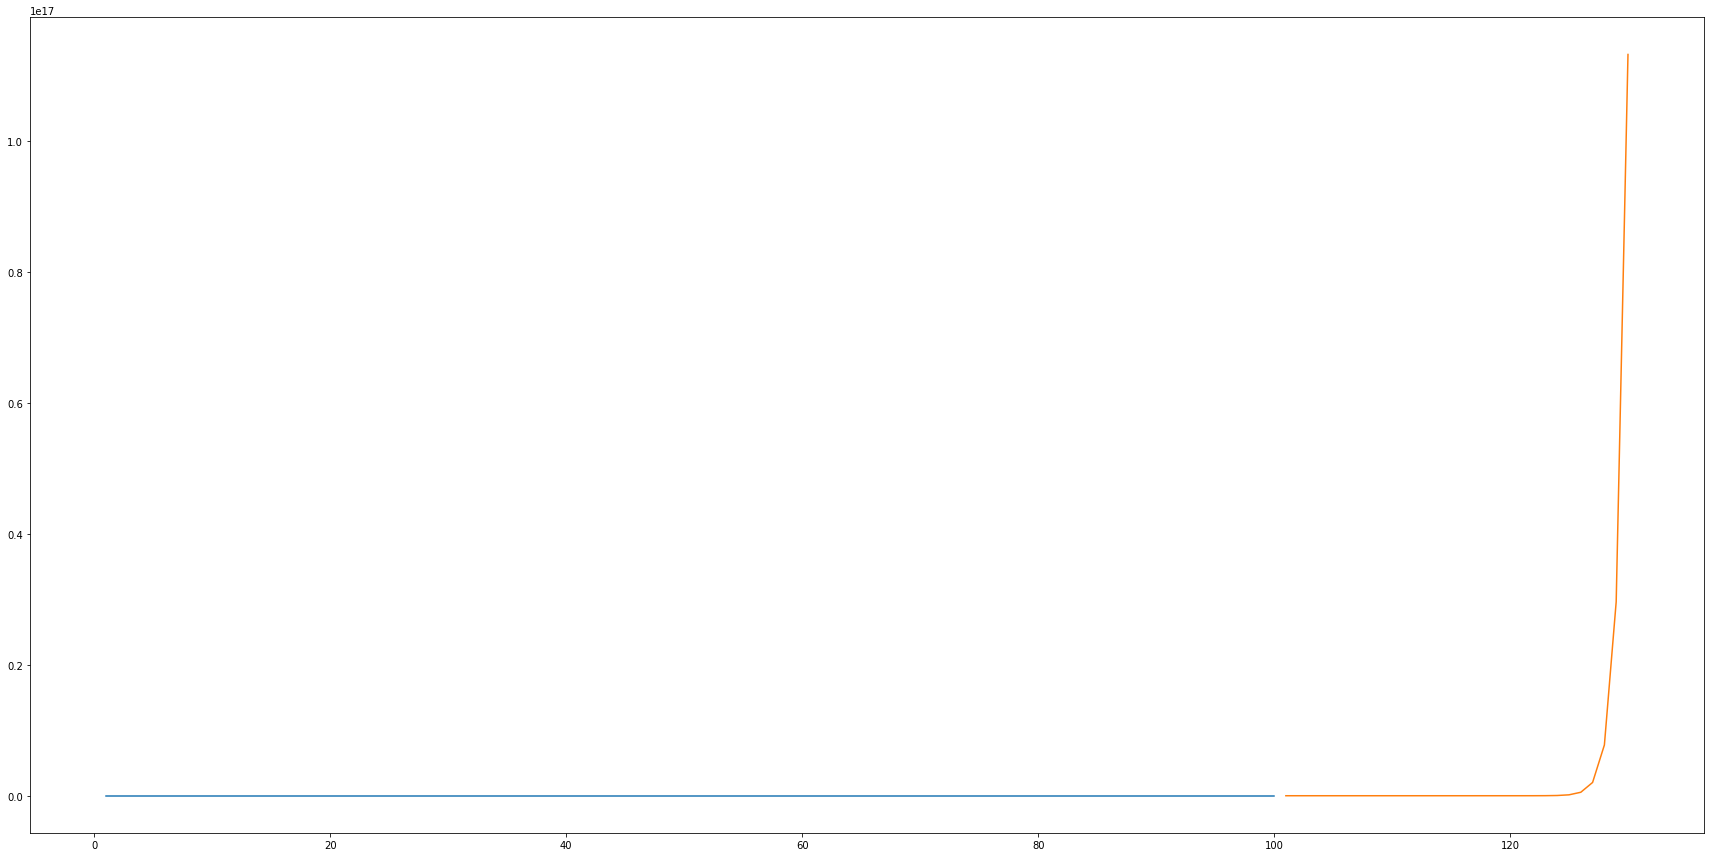

In [140]:
plt.figure(figsize=(30, 15))
plt.plot(time_new,scaler.inverse_transform(df1[(len(df1)-n_steps):]))
plt.plot(time_pred,scaler.inverse_transform(lst_output))
plt.show()

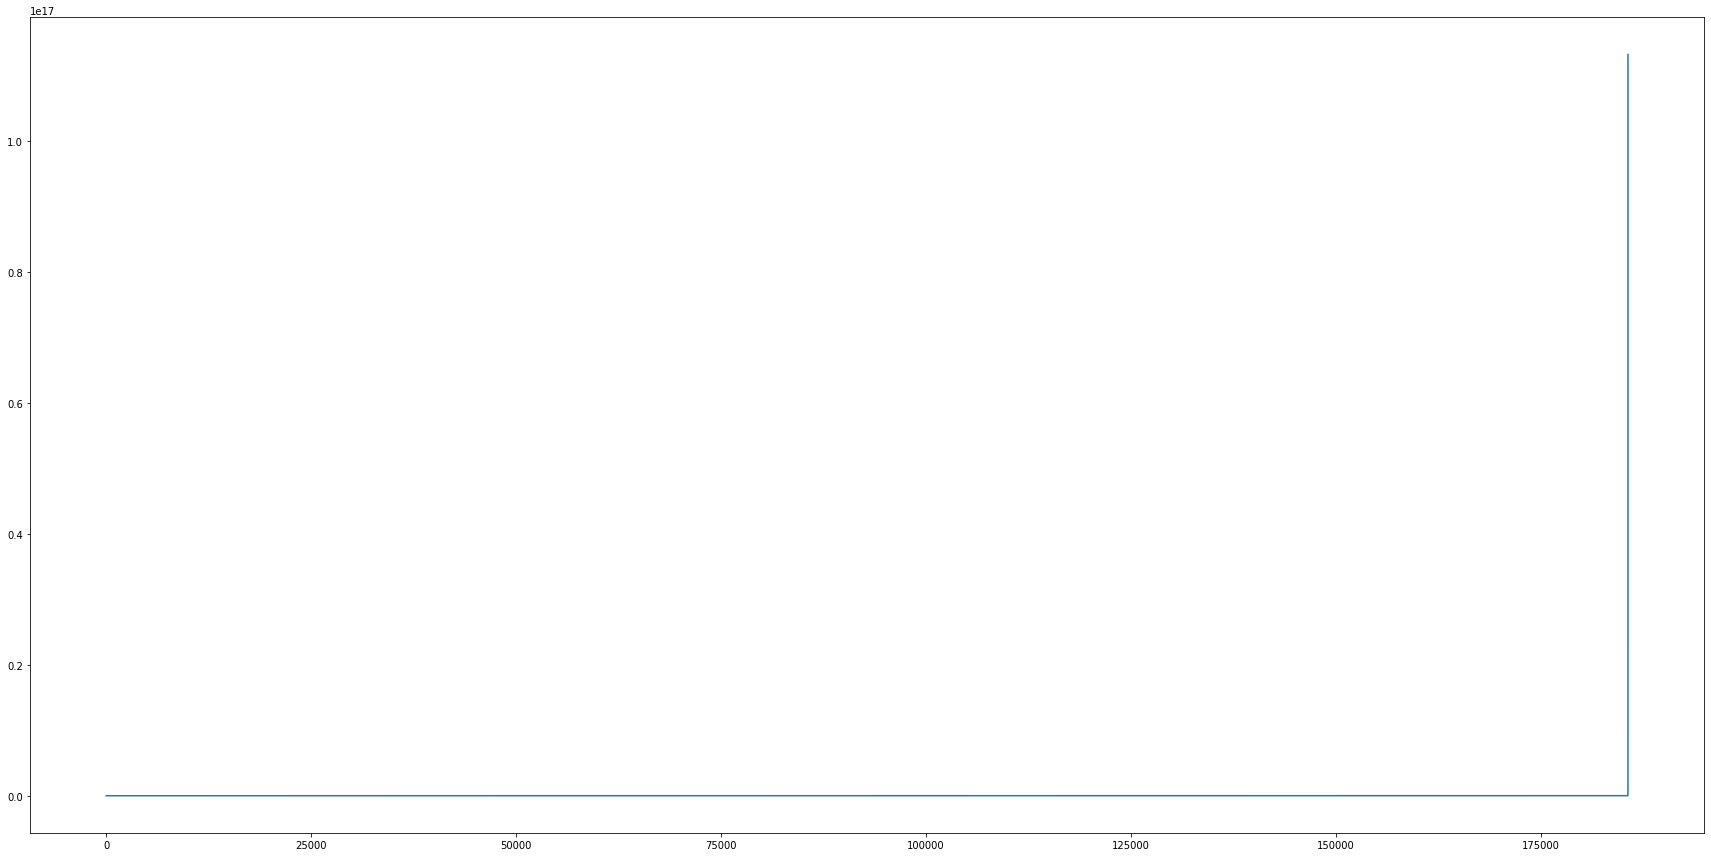

In [141]:
#extend prediction on the graph

df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()

plt.figure(figsize=(30, 15))
plt.plot(df3)
plt.show()

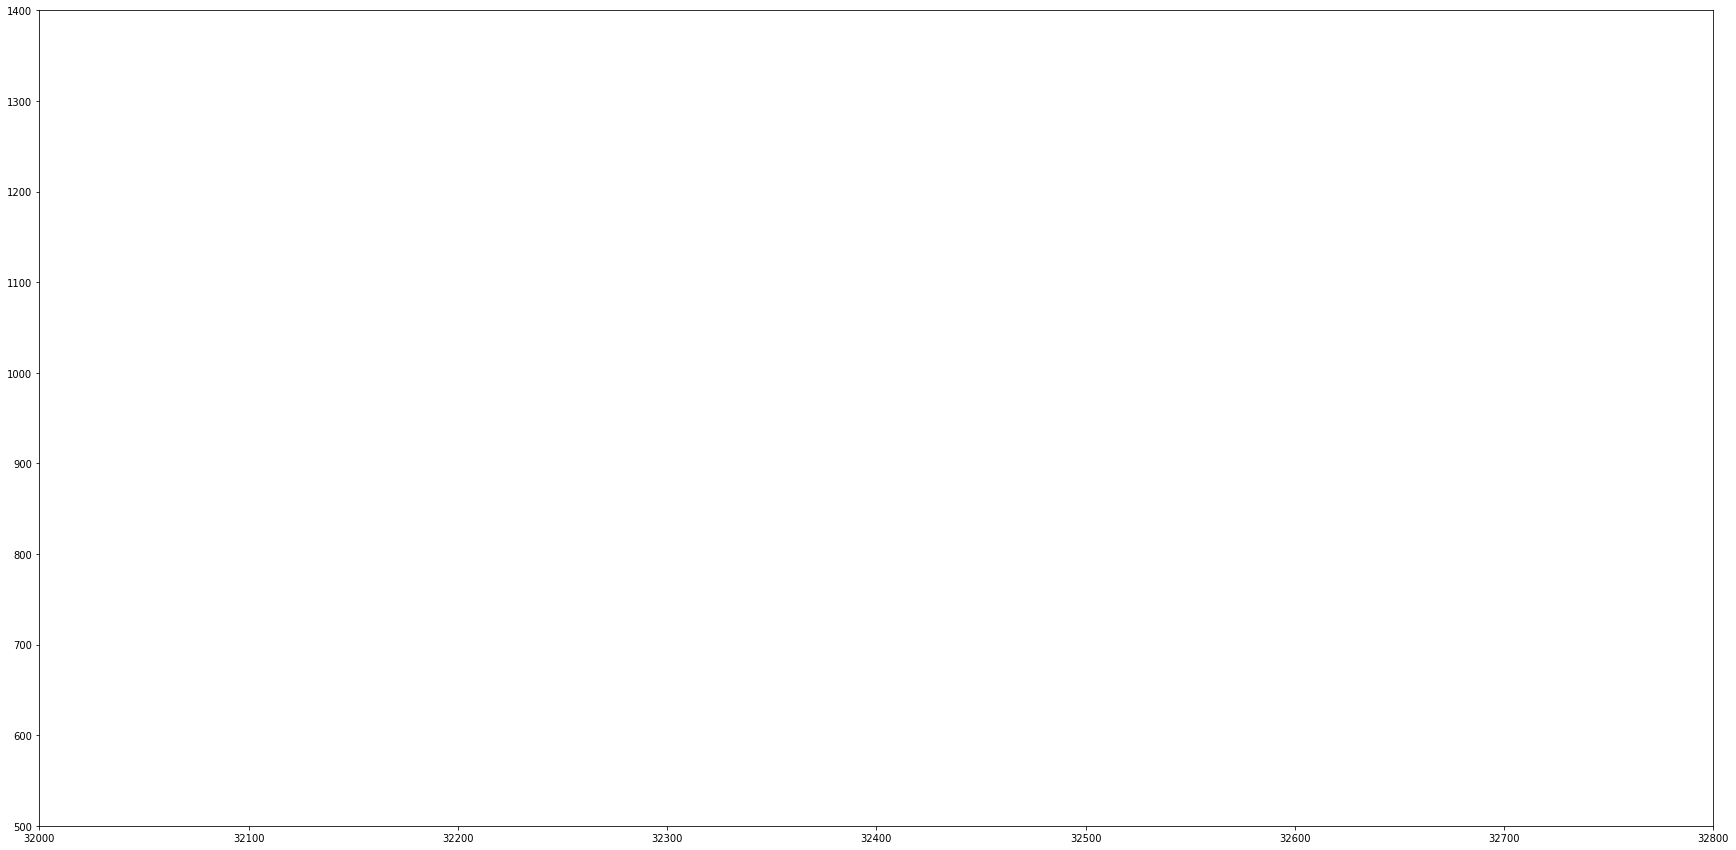

In [142]:
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([32000,32800,500,1400])
plt.plot(df3)
plt.show()